In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.arima_model          import  ARMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('train-2.csv')
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [3]:
df.tail()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [4]:
df.shape

(1017209, 9)

In [5]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [9]:
## df=df.sort_index()

In [10]:
# df.head()

In [11]:
# df.set_index('Date', inplace=True)

In [12]:
#df.head()

In [13]:
atr=df[df['Store']==931]

In [14]:
atr

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
930        931          5 2015-07-31   5943        713     1      1   
2045       931          4 2015-07-30   5720        645     1      1   
3160       931          3 2015-07-29   5558        662     1      1   
4275       931          2 2015-07-28   5798        617     1      1   
5390       931          1 2015-07-27   7024        686     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1012565    931          6 2013-01-05   2341        277     1      0   
1013680    931          5 2013-01-04   2525        324     1      0   
1014795    931          4 2013-01-03   3047        431     1      0   
1015910    931          3 2013-01-02   3574        476     1      0   
1017025    931          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
930                0              1  
2045               0              1  
3160               0              1  
4275               0              1  
5390               0              1  
...              ...            ...  
1012565            0              0  
1013680            0              1  
1014795            0              1  
1015910            0              1  
1017025            a              1  

[942 rows x 9 columns]

In [15]:
atr.Sales.value_counts()

0       67
3124     4
3375     3
3430     3
4510     3
        ..
5350     1
4782     1
5019     1
5571     1
3047     1
Name: Sales, Length: 777, dtype: int64

In [18]:
atr['Sales']=atr['Sales'].replace(0,112)

In [20]:
atr.Sales.value_counts()

112     67
3124     4
3375     3
3430     3
4510     3
        ..
5350     1
4782     1
5019     1
5571     1
3047     1
Name: Sales, Length: 777, dtype: int64

In [21]:
atr

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
930        931          5 2015-07-31   5943        713     1      1   
2045       931          4 2015-07-30   5720        645     1      1   
3160       931          3 2015-07-29   5558        662     1      1   
4275       931          2 2015-07-28   5798        617     1      1   
5390       931          1 2015-07-27   7024        686     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1012565    931          6 2013-01-05   2341        277     1      0   
1013680    931          5 2013-01-04   2525        324     1      0   
1014795    931          4 2013-01-03   3047        431     1      0   
1015910    931          3 2013-01-02   3574        476     1      0   
1017025    931          2 2013-01-01    112          0     0      0   

        StateHoliday  SchoolHoliday  
930                0              1  
2045               0              1  
3160               0              1  
4275               0              1  
5390               0              1  
...              ...            ...  
1012565            0              0  
1013680            0              1  
1014795            0              1  
1015910            0              1  
1017025            a              1  

[942 rows x 9 columns]

In [22]:
atr=atr.sort_index()

In [23]:
atr

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
930        931          5 2015-07-31   5943        713     1      1   
2045       931          4 2015-07-30   5720        645     1      1   
3160       931          3 2015-07-29   5558        662     1      1   
4275       931          2 2015-07-28   5798        617     1      1   
5390       931          1 2015-07-27   7024        686     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1012565    931          6 2013-01-05   2341        277     1      0   
1013680    931          5 2013-01-04   2525        324     1      0   
1014795    931          4 2013-01-03   3047        431     1      0   
1015910    931          3 2013-01-02   3574        476     1      0   
1017025    931          2 2013-01-01    112          0     0      0   

        StateHoliday  SchoolHoliday  
930                0              1  
2045               0              1  
3160               0              1  
4275               0              1  
5390               0              1  
...              ...            ...  
1012565            0              0  
1013680            0              1  
1014795            0              1  
1015910            0              1  
1017025            a              1  

[942 rows x 9 columns]

In [24]:
atr=atr.set_index('Date')

In [25]:
atr.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    931          5   5943        713     1      1            0   
2015-07-30    931          4   5720        645     1      1            0   
2015-07-29    931          3   5558        662     1      1            0   
2015-07-28    931          2   5798        617     1      1            0   
2015-07-27    931          1   7024        686     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

In [26]:
atr.tail()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2013-01-05    931          6   2341        277     1      0            0   
2013-01-04    931          5   2525        324     1      0            0   
2013-01-03    931          4   3047        431     1      0            0   
2013-01-02    931          3   3574        476     1      0            0   
2013-01-01    931          2    112          0     0      0            a   

            SchoolHoliday  
Date                       
2013-01-05              0  
2013-01-04              1  
2013-01-03              1  
2013-01-02              1  
2013-01-01              1

In [27]:
data=atr.copy()

In [28]:
data1=atr.copy()

In [29]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    931          5   5943        713     1      1            0   
2015-07-30    931          4   5720        645     1      1            0   
2015-07-29    931          3   5558        662     1      1            0   
2015-07-28    931          2   5798        617     1      1            0   
2015-07-27    931          1   7024        686     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

In [30]:
data.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    931          5   5943        713     1      1            0   
2015-07-30    931          4   5720        645     1      1            0   
2015-07-29    931          3   5558        662     1      1            0   
2015-07-28    931          2   5798        617     1      1            0   
2015-07-27    931          1   7024        686     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

Text(0, 0.5, 'Daily Sales of store 682')

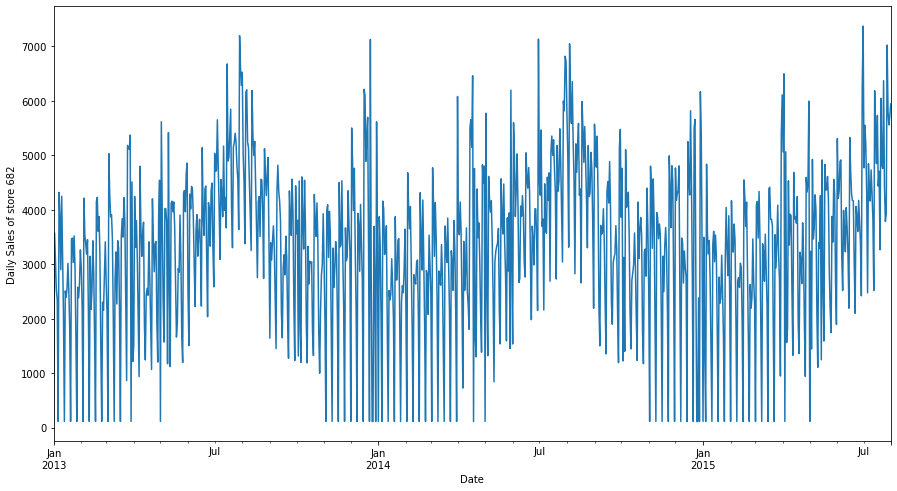

In [31]:
plt.figure(figsize=(15,8))
data['Sales'].plot()
plt.ylabel('Daily Sales of store 682')

In [32]:
data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [33]:
data=data.drop(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'], axis=1)

In [34]:
data

Sales
Date             
2015-07-31   5943
2015-07-30   5720
2015-07-29   5558
2015-07-28   5798
2015-07-27   7024
...           ...
2013-01-05   2341
2013-01-04   2525
2013-01-03   3047
2013-01-02   3574
2013-01-01    112

[942 rows x 1 columns]

In [35]:
atr.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [36]:
atr.Sales.describe()

count     942.000000
mean     3341.547771
std      1482.091437
min       112.000000
25%      2509.250000
50%      3456.000000
75%      4311.750000
max      7372.000000
Name: Sales, dtype: float64

In [37]:
data2=data['Sales']
data2.head()

Date
2015-07-31    5943
2015-07-30    5720
2015-07-29    5558
2015-07-28    5798
2015-07-27    7024
Name: Sales, dtype: int64

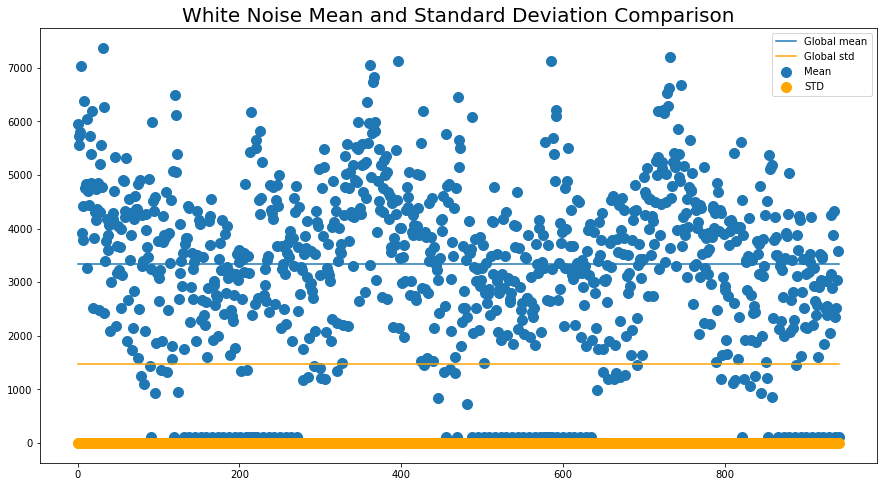

In [38]:
# Split into an arbitraty number of chunks
white_noise_chunks = data2
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
    
# Plot
plt.figure(figsize=(15,8))
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [data2.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [data2.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

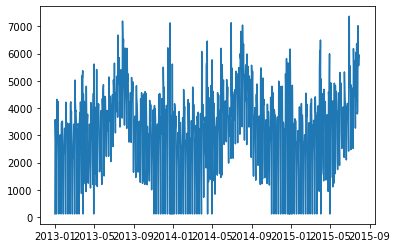

In [39]:
plt.plot(data2)

***Resampling data on weekly basis***

In [40]:
data2.resample('W').sum()

Date
2013-01-06    11711
2013-01-13    20658
2013-01-20    14937
2013-01-27    18111
2013-02-03    16107
              ...  
2015-07-05    35934
2015-07-12    28738
2015-07-19    34558
2015-07-26    34134
2015-08-02    30043
Freq: W-SUN, Name: Sales, Length: 135, dtype: int64

<AxesSubplot:xlabel='Date'>

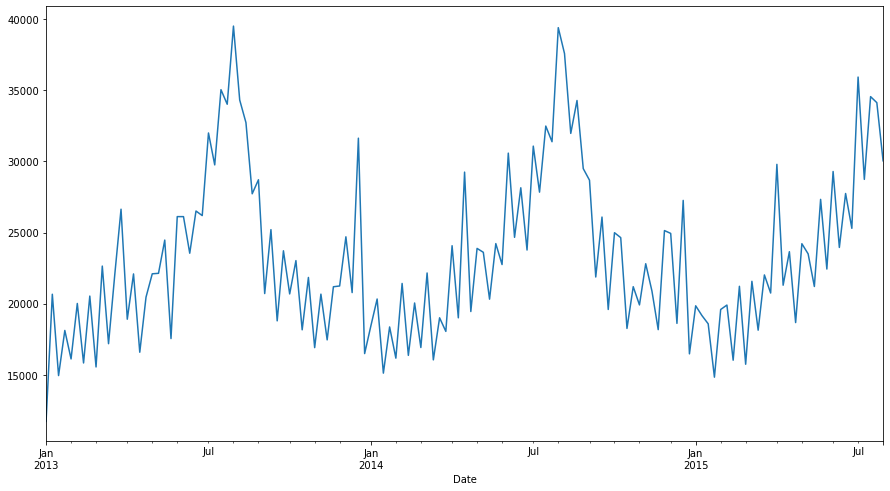

In [41]:
plt.figure(figsize=(15,8))
data2.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

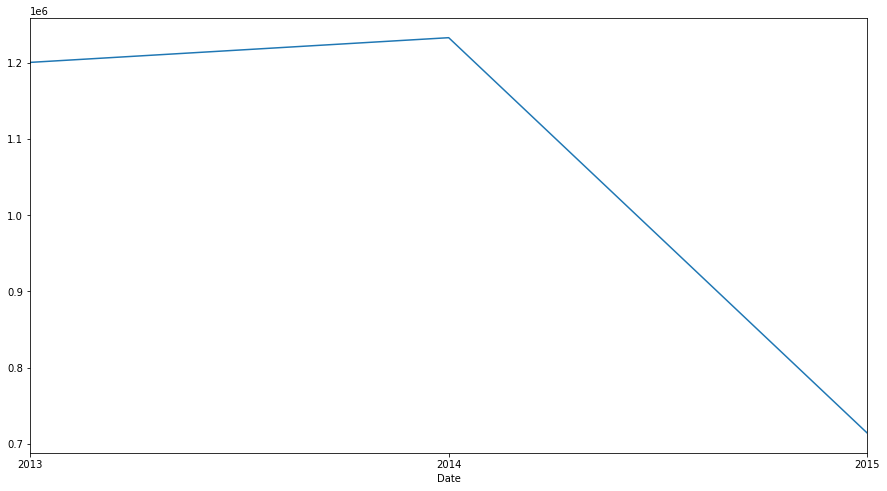

In [42]:
plt.figure(figsize=(15,8))
data2.resample('Y').sum().plot()  

<AxesSubplot:xlabel='Date'>

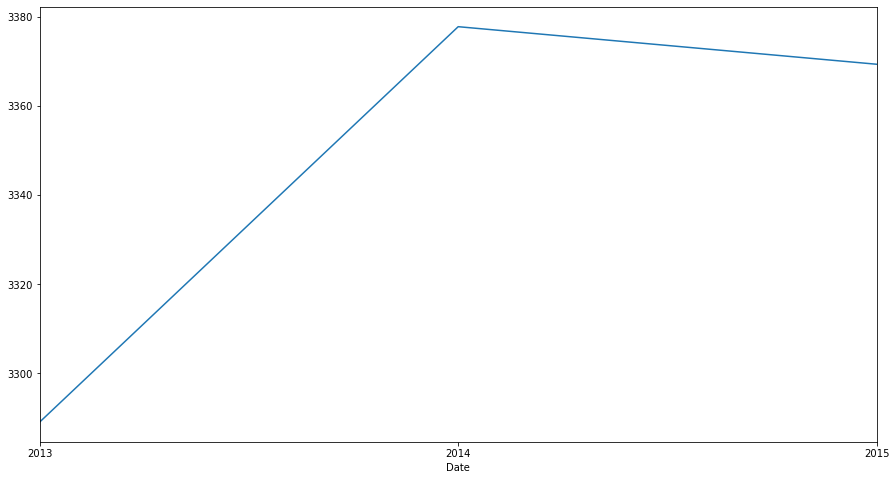

In [43]:
plt.figure(figsize=(15,8))
data2.resample('Y').mean().plot()

In [44]:
data2.index

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
               '2015-07-23', '2015-07-22',
               ...
               '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
               '2013-01-06', '2013-01-05', '2013-01-04', '2013-01-03',
               '2013-01-02', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [45]:
data2.index.dayofweek

Int64Index([4, 3, 2, 1, 0, 6, 5, 4, 3, 2,
            ...
            3, 2, 1, 0, 6, 5, 4, 3, 2, 1],
           dtype='int64', name='Date', length=942)

In [46]:
data1.groupby(data2.index.dayofweek)['Sales'].mean()

Date
0    4276.223881
1    3930.814815
2    3584.548148
3    4083.740741
4    3651.622222
5    2654.955224
6    1194.865672
Name: Sales, dtype: float64

In [47]:
weekday=data1.groupby(data2.index.dayofweek)['Sales'].mean()
weekday

Date
0    4276.223881
1    3930.814815
2    3584.548148
3    4083.740741
4    3651.622222
5    2654.955224
6    1194.865672
Name: Sales, dtype: float64

In [48]:
weekday.index=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

In [49]:
weekday

Mon     4276.223881
Tue     3930.814815
Wed     3584.548148
Thur    4083.740741
Fri     3651.622222
Sat     2654.955224
Sun     1194.865672
Name: Sales, dtype: float64

<AxesSubplot:>

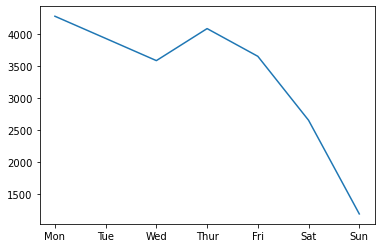

In [50]:
weekday.plot()

In [51]:
data2.index.dayofyear   

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
             10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
           dtype='int64', name='Date', length=942)

In [52]:
days=data2.index.dayofyear 
days

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
             10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
           dtype='int64', name='Date', length=942)

In [53]:
data1.groupby(days)['Sales'].mean()

Date
1       112.000000
2      3645.000000
3      2597.666667
4      1570.666667
5      2429.666667
          ...     
361    3037.000000
362    1394.000000
363    3139.500000
364    5516.500000
365    3224.500000
Name: Sales, Length: 365, dtype: float64

Text(0, 0.5, 'Avg sales')

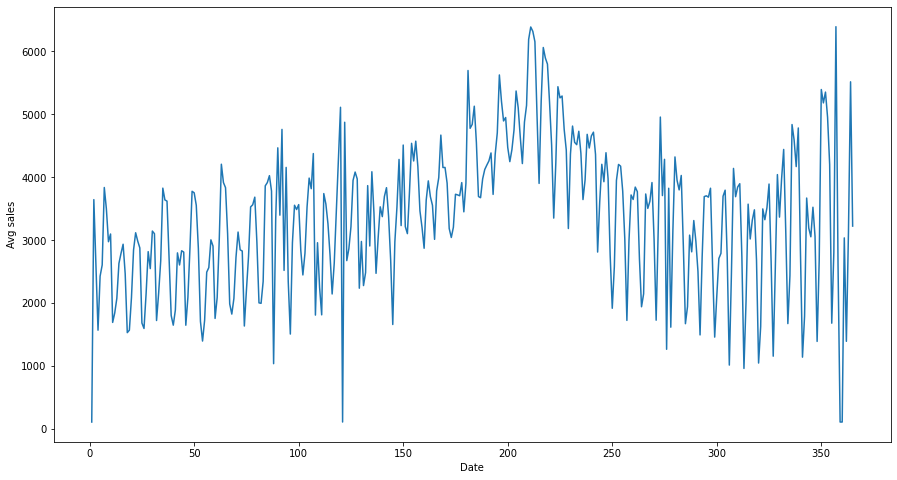

In [54]:
plt.figure(figsize=(15,8))
data1.groupby(days)['Sales'].mean().plot()
plt.ylabel('Avg sales')

In [55]:
data2.index.quarter

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Date', length=942)

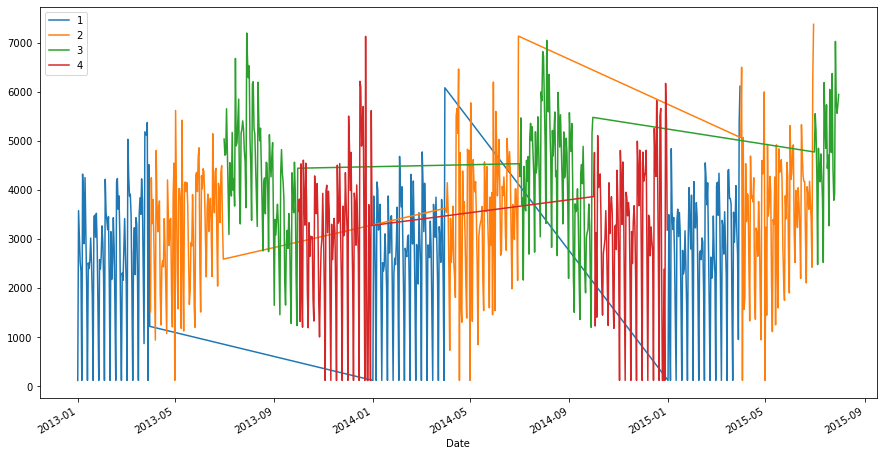

In [56]:
plt.figure(figsize=(15,8))
data.groupby(data2.index.quarter)['Sales'].plot()
plt.legend()

In [57]:
#  trend of Sales on weekdays vs weekends 

In [58]:
data1['dayofweek']=data1.index.dayofweek

In [59]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    931          5   5943        713     1      1            0   
2015-07-30    931          4   5720        645     1      1            0   
2015-07-29    931          3   5558        662     1      1            0   
2015-07-28    931          2   5798        617     1      1            0   
2015-07-27    931          1   7024        686     1      1            0   

            SchoolHoliday  dayofweek  
Date                                  
2015-07-31              1          4  
2015-07-30              1          3  
2015-07-29              1          2  
2015-07-28              1          1  
2015-07-27              1          0

In [60]:
def assign_label(features):
    if features<5:
        return 'weekday'
    else:
        return 'weekend'

In [61]:
data1['dayofweek']=data1['dayofweek'].apply(assign_label)

In [62]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    931          5   5943        713     1      1            0   
2015-07-30    931          4   5720        645     1      1            0   
2015-07-29    931          3   5558        662     1      1            0   
2015-07-28    931          2   5798        617     1      1            0   
2015-07-27    931          1   7024        686     1      1            0   

            SchoolHoliday dayofweek  
Date                                 
2015-07-31              1   weekday  
2015-07-30              1   weekday  
2015-07-29              1   weekday  
2015-07-28              1   weekday  
2015-07-27              1   weekday

<AxesSubplot:title={'center':'Weekend Sales'}, xlabel='Date'>

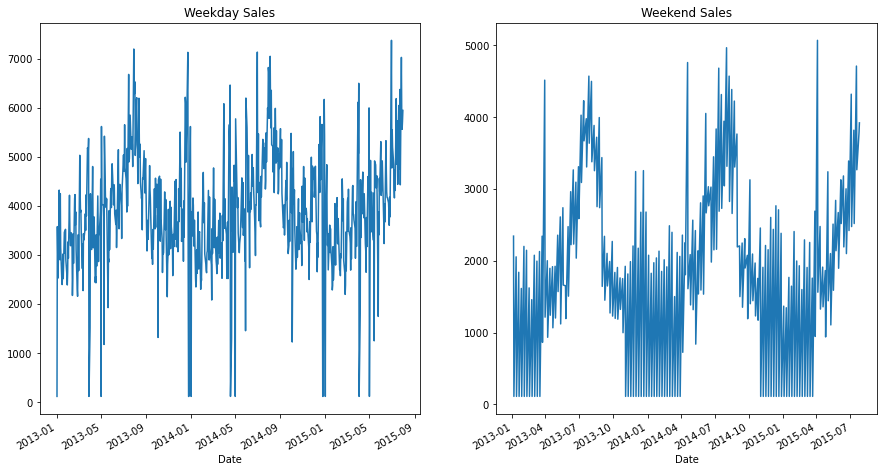

In [63]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
data1[data1['dayofweek']=='weekday']['Sales'].plot(ax=ax[0], title='Weekday Sales')
data1[data1['dayofweek']=='weekend']['Sales'].plot(ax=ax[1], title='Weekend Sales')

***naive model***

In [64]:
data1['Sales'].shift(1)

Date
2015-07-31       NaN
2015-07-30    5943.0
2015-07-29    5720.0
2015-07-28    5558.0
2015-07-27    5798.0
               ...  
2013-01-05     112.0
2013-01-04    2341.0
2013-01-03    2525.0
2013-01-02    3047.0
2013-01-01    3574.0
Name: Sales, Length: 942, dtype: float64

In [65]:
data1['prediction_naive']=data1['Sales'].shift(1)

In [66]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    931          5   5943        713     1      1            0   
2015-07-30    931          4   5720        645     1      1            0   
2015-07-29    931          3   5558        662     1      1            0   
2015-07-28    931          2   5798        617     1      1            0   
2015-07-27    931          1   7024        686     1      1            0   

            SchoolHoliday dayofweek  prediction_naive  
Date                                                   
2015-07-31              1   weekday               NaN  
2015-07-30              1   weekday            5943.0  
2015-07-29              1   weekday            5720.0  
2015-07-28              1   weekday            5558.0  
2015-07-27              1   weekday            5798.0

<AxesSubplot:xlabel='Date'>

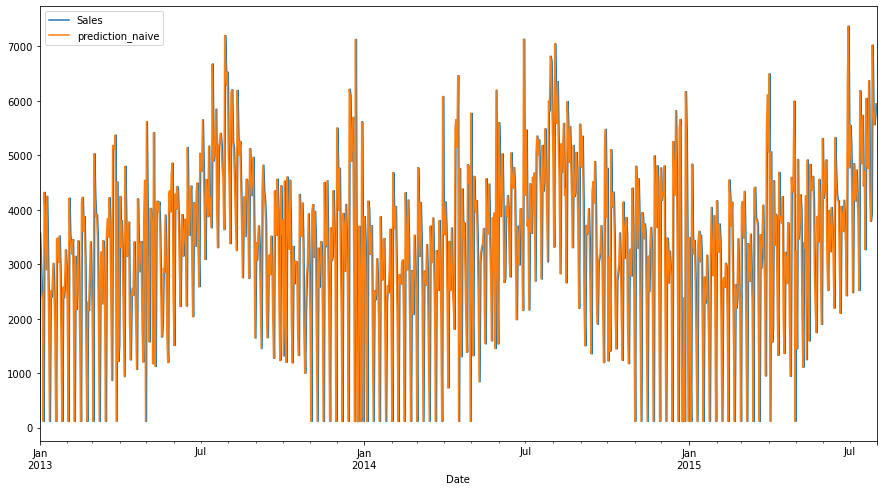

In [67]:
data1[['Sales','prediction_naive']].plot(figsize=(15,8))

In [68]:
# No much change , predicted vs actual are overlapping

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
rmse=np.sqrt(mean_squared_error(data1['Sales'][1:], data1['prediction_naive'][1:]))
rmse

1758.7172455025438

<AxesSubplot:xlabel='Date'>

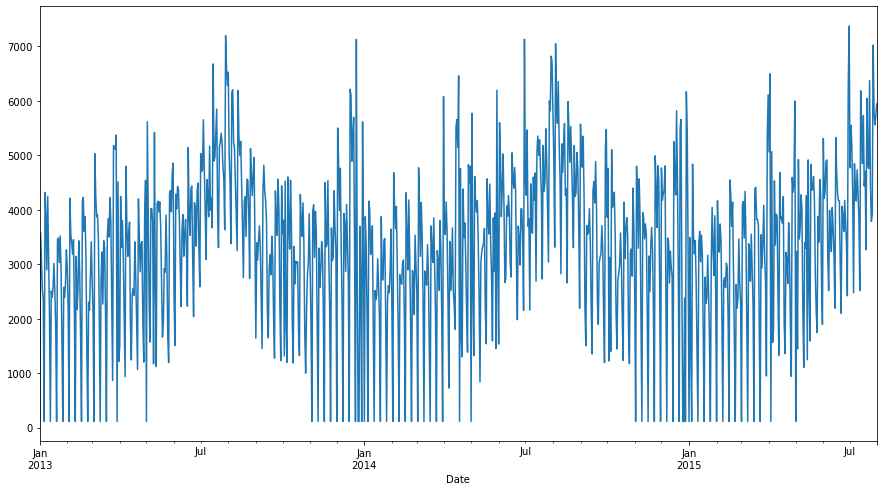

In [71]:
plt.figure(figsize=(15,8))
data1['Sales'].plot()

In [72]:
mean=data1['Sales'].rolling(window=7).mean()
std=data1['Sales'].rolling(window=7).std()

In [73]:
mean

Date
2015-07-31            NaN
2015-07-30            NaN
2015-07-29            NaN
2015-07-28            NaN
2015-07-27            NaN
                 ...     
2013-01-05    2992.285714
2013-01-04    2903.428571
2013-01-03    2732.000000
2013-01-02    2828.571429
2013-01-01    2289.857143
Name: Sales, Length: 942, dtype: float64

In [74]:
std

Date
2015-07-31            NaN
2015-07-30            NaN
2015-07-29            NaN
2015-07-28            NaN
2015-07-27            NaN
                 ...     
2013-01-05    1465.050820
2013-01-04    1472.944540
2013-01-03    1355.673756
2013-01-02    1393.032287
2013-01-01    1626.841667
Name: Sales, Length: 942, dtype: float64

In [75]:
mean.head(20)

Date
2015-07-31            NaN
2015-07-30            NaN
2015-07-29            NaN
2015-07-28            NaN
2015-07-27            NaN
2015-07-26            NaN
2015-07-25    5392.000000
2015-07-24    5175.285714
2015-07-23    5268.142857
2015-07-22    5153.857143
2015-07-21    5016.285714
2015-07-20    4876.285714
2015-07-19    4783.142857
2015-07-18    4914.714286
2015-07-17    4916.000000
2015-07-16    4824.714286
2015-07-15    4837.285714
2015-07-14    4916.857143
2015-07-13    4936.857143
2015-07-12    4830.000000
Name: Sales, dtype: float64

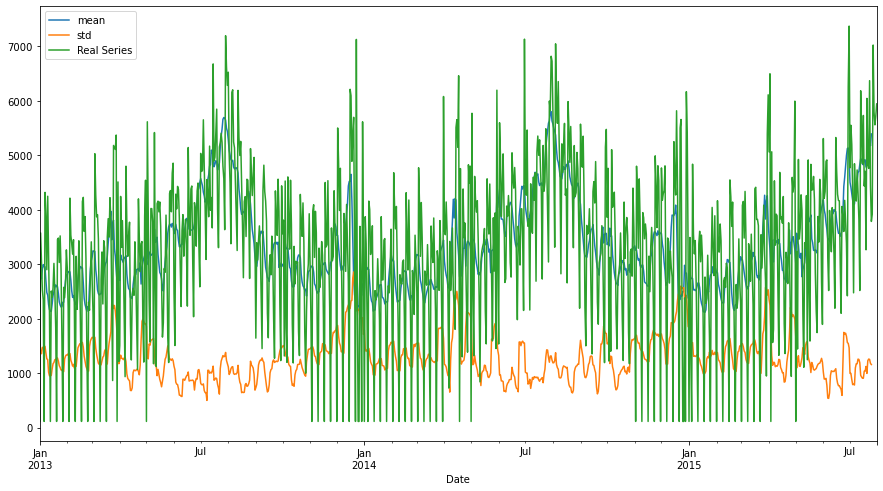

In [76]:
plt.figure(figsize=(15,8))
mean.plot(label='mean')
std.plot(label='std')
data1['Sales'].plot(label='Real Series')
plt.legend()
plt.show()

In [77]:
data1['Sales'].isnull().sum()

0

rolling mean is not stationary and varies with time, have to eliminate trend and seasonality

#### Augmented Dicky fullers test

In [78]:
# H0: series is non stationary
# H1: serires is stationary 
# threshold: 0.5

In [79]:
from statsmodels.tsa.stattools import adfuller

In [80]:
adfuller(data1['Sales'])

(-2.6592350580557715,
 0.0813618938388237,
 21,
 920,
 {'1%': -3.4374778690219956,
  '5%': -2.864686684217556,
  '10%': -2.5684454926748583},
 15179.471469387057)

In [81]:
result=adfuller(data1['Sales'])
labels=['ADf Test Statics', 'p-value', 'lags used', 'No of observations used', 'Critical values']

for value,label in zip(result,labels):
    print("{} : {}".format(label,value))
    

ADf Test Statics : -2.6592350580557715
p-value : 0.0813618938388237
lags used : 21
No of observations used : 920
Critical values : {'1%': -3.4374778690219956, '5%': -2.864686684217556, '10%': -2.5684454926748583}


In [82]:
def test_for_stationarity(feature):
    mean=data1[feature].rolling(window=7).mean()
    std=data1[feature].rolling(window=7).std()
    
    plt.figure(figsize=(15,8))
    mean.plot(label='mean')
    std.plot(label='std')
    data1[feature].plot(label='Real Series')
    plt.legend()
    plt.show()
    
    result=adfuller(data[feature].dropna())
    labels=['ADf Test Statics', 'p-value', 'lags used', 'No of observations used', 'Critical values']

    for value,label in zip(result,labels):
        print("{} : {}".format(label,value))
    
    
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis i.e we are rejecting the null hypothesis and we can state that our data is Stationary')
    else:
        print('Weak evidence against the null hypothesis i.e we are accepting the null hypothesis and we can state that our data is non-Stationary')
     

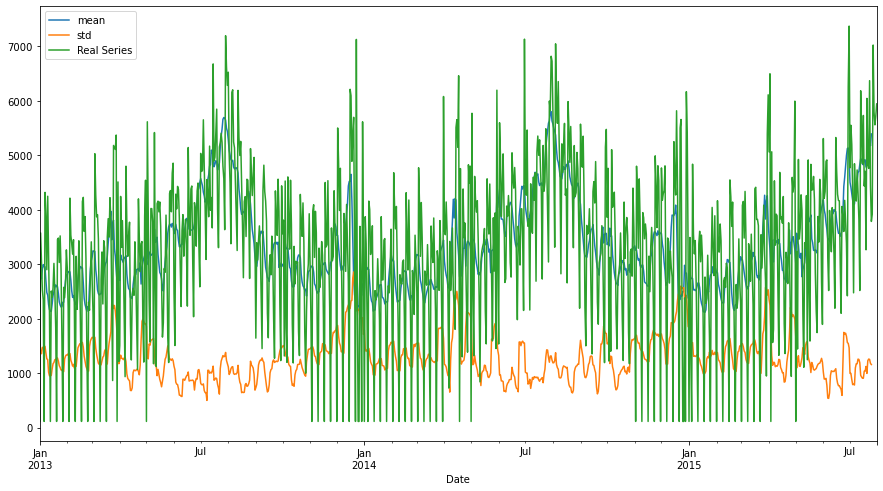

ADf Test Statics : -2.6592350580557715
p-value : 0.0813618938388237
lags used : 21
No of observations used : 920
Critical values : {'1%': -3.4374778690219956, '5%': -2.864686684217556, '10%': -2.5684454926748583}
Weak evidence against the null hypothesis i.e we are accepting the null hypothesis and we can state that our data is non-Stationary


In [83]:
test_for_stationarity('Sales')

<AxesSubplot:xlabel='Date'>

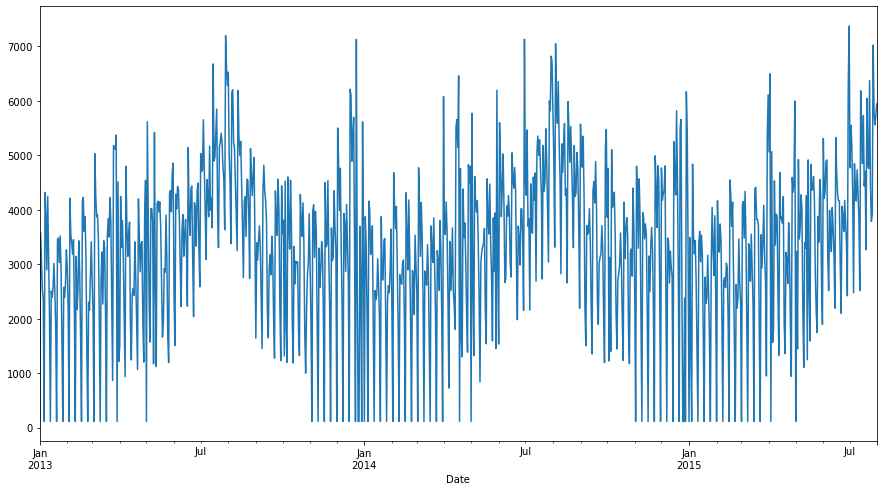

In [84]:
plt.figure(figsize=(15,8))
data1['Sales'].plot()

<AxesSubplot:xlabel='Date'>

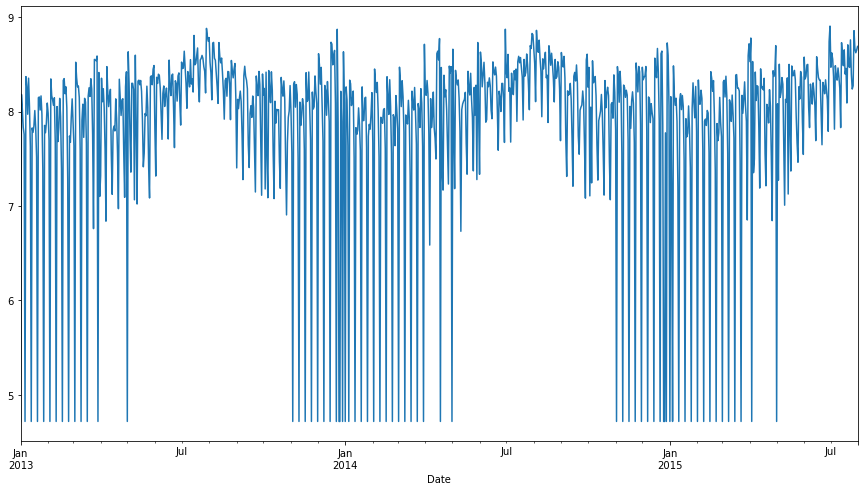

In [85]:
plt.figure(figsize=(15,8))
np.log(data1['Sales']).plot()

In [86]:
log_data=np.log(data1['Sales'])
log_data

Date
2015-07-31    8.689969
2015-07-30    8.651724
2015-07-29    8.622994
2015-07-28    8.665268
2015-07-27    8.857088
                ...   
2013-01-05    7.758333
2013-01-04    7.833996
2013-01-03    8.021913
2013-01-02    8.181441
2013-01-01    4.718499
Name: Sales, Length: 942, dtype: float64

In [87]:
rolling_avg=log_data-log_data.shift(7)
rolling_avg

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05    0.131276
2013-01-04   -0.220209
2013-01-03   -0.332055
2013-01-02    0.209665
2013-01-01   -3.545864
Name: Sales, Length: 942, dtype: float64

In [88]:
Rolling_average=log_data.rolling(window=7).mean()

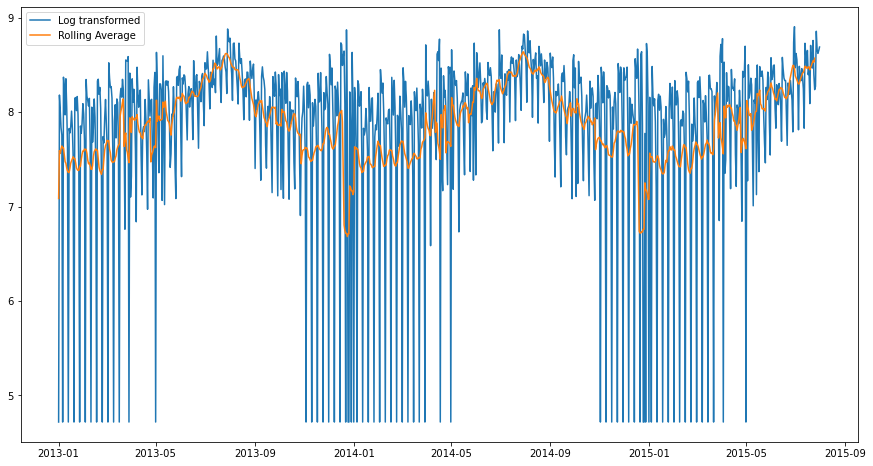

In [89]:
plt.figure(figsize=(15,8))
plt.plot(log_data, label='Log transformed')
plt.plot(Rolling_average, label='Rolling Average')
plt.legend()

In [90]:
lr_diff=log_data-Rolling_average

In [91]:
lr_diff

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05    0.116663
2013-01-04    0.223784
2013-01-03    0.459137
2013-01-02    0.588713
2013-01-01   -2.367677
Name: Sales, Length: 942, dtype: float64

In [92]:
data1['lr_diff']=lr_diff

In [93]:
log_ts=log_data-log_data.shift(7)
log_ts

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05    0.131276
2013-01-04   -0.220209
2013-01-03   -0.332055
2013-01-02    0.209665
2013-01-01   -3.545864
Name: Sales, Length: 942, dtype: float64

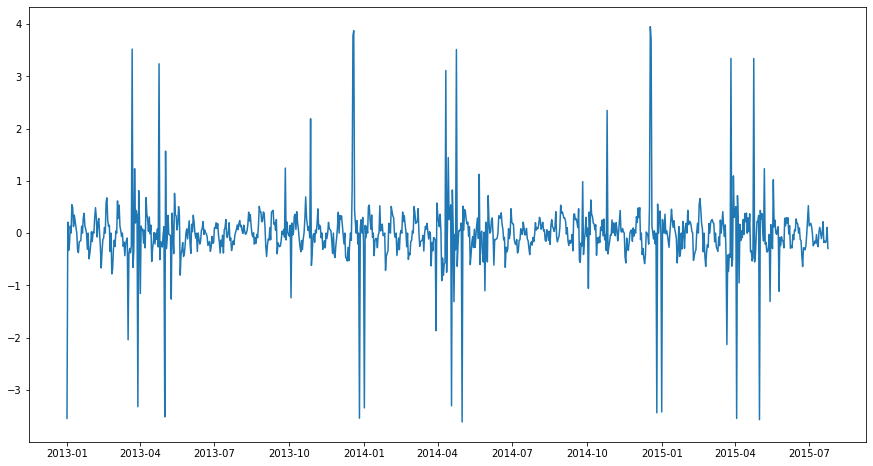

In [94]:
plt.figure(figsize=(15,8))
plt.plot(log_ts)

In [95]:
# With respect to seasonality this is my trend

In [96]:
data1['log_ts']=log_ts

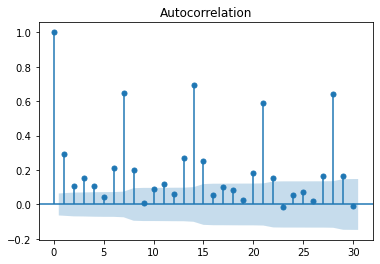

In [97]:
plot_acf(data1['Sales']);

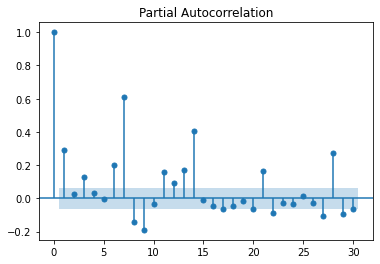

In [98]:
plot_pacf(data1['Sales']);

In [99]:
df2_decompose= seasonal_decompose(data['Sales'], model='additive')

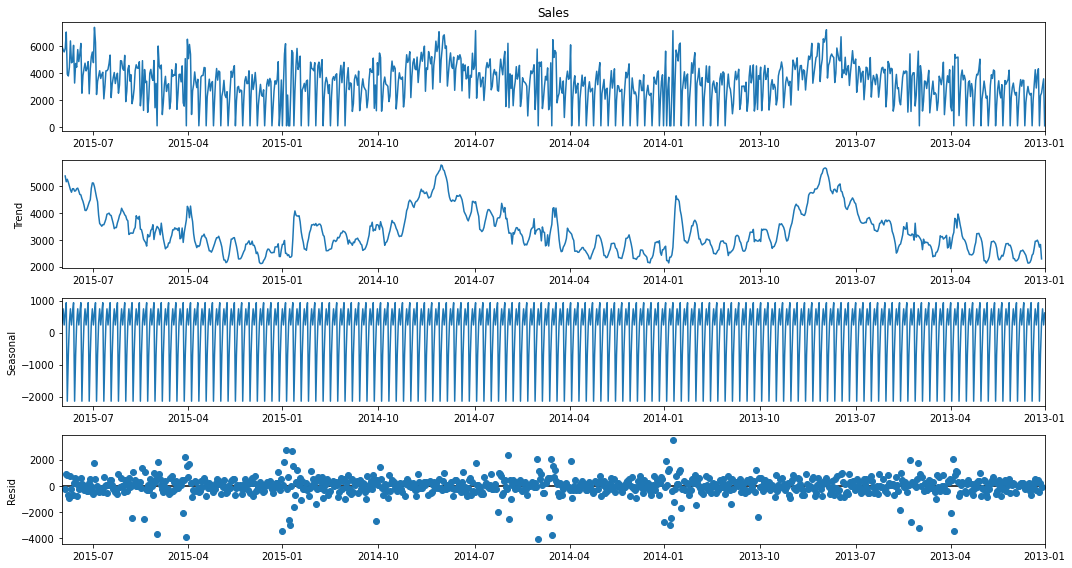

In [100]:
plt.rcParams['figure.figsize']=[15,8]
df2_decompose.plot();
plt.show()

Text(0.5, 0, 'Days')

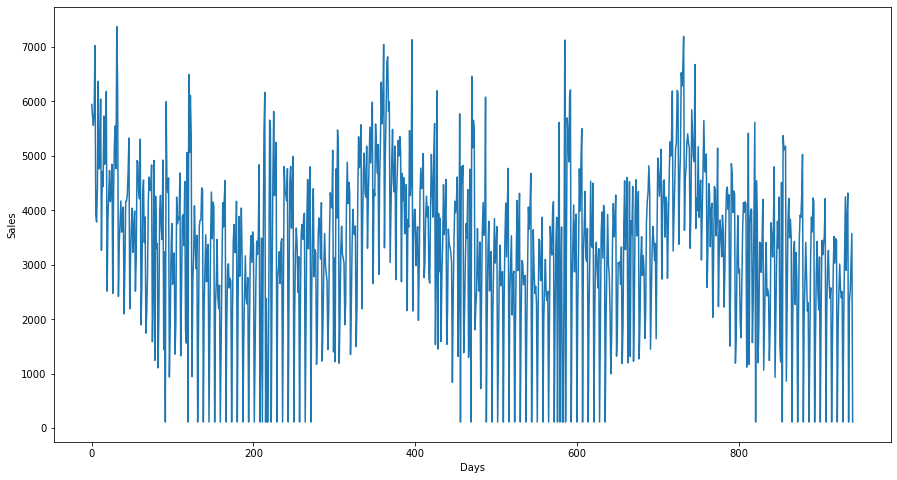

In [101]:
x=list(range(len(data2.index)))
y=data.Sales

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

In [102]:
## Let's apply fourier transform

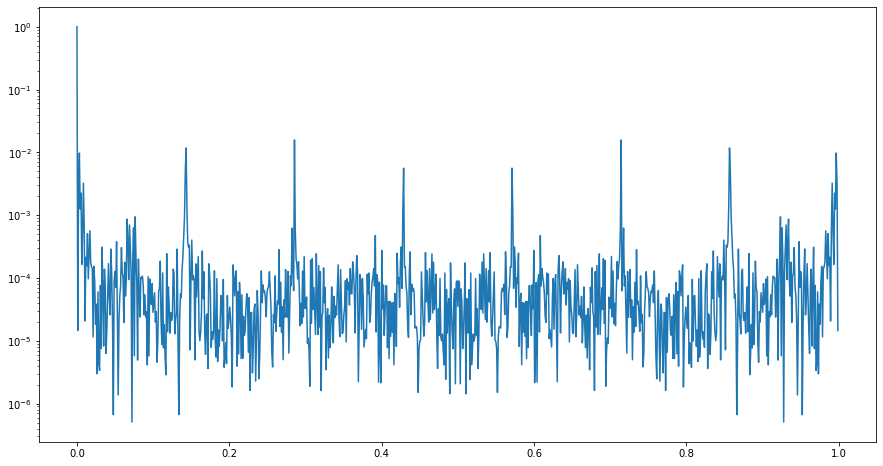

In [103]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

In [104]:
# Fourier transform with X-axix in days (also adding time period)

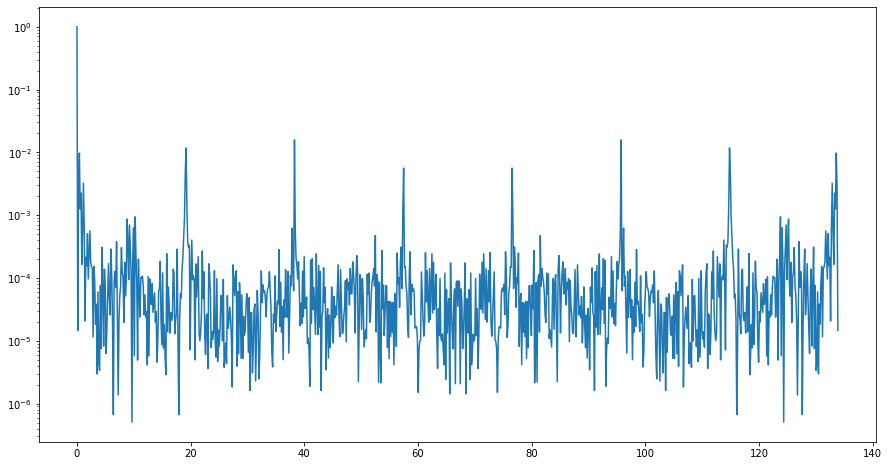

In [105]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/134)
plt.semilogy(results['period'], results['nspectrum'])

In [106]:
# Let's regroup the sales data to make the plot smoother

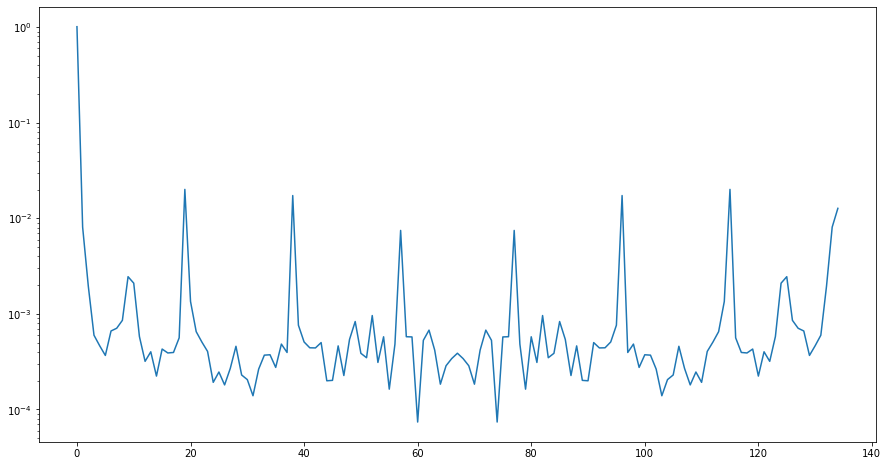

In [107]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.1,1))
data2=scaler.fit_transform(np.array(data2).reshape(-1,1))

In [109]:
data=data.reindex(index=data.index[::-1])

In [110]:
data

Sales
Date             
2013-01-01    112
2013-01-02   3574
2013-01-03   3047
2013-01-04   2525
2013-01-05   2341
...           ...
2015-07-27   7024
2015-07-28   5798
2015-07-29   5558
2015-07-30   5720
2015-07-31   5943

[942 rows x 1 columns]

In [111]:
dataa=data.copy()

In [112]:
dataa

Sales
Date             
2013-01-01    112
2013-01-02   3574
2013-01-03   3047
2013-01-04   2525
2013-01-05   2341
...           ...
2015-07-27   7024
2015-07-28   5798
2015-07-29   5558
2015-07-30   5720
2015-07-31   5943

[942 rows x 1 columns]

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.1,1))
dataa['Sales']=scaler.fit_transform(np.array(dataa['Sales']).reshape(-1,1))

In [114]:
train_end=datetime(2015,1,31)
test_end=datetime(2015,7,31)

In [115]:
dataa

Sales
Date                
2013-01-01  0.100000
2013-01-02  0.529174
2013-01-03  0.463843
2013-01-04  0.399132
2013-01-05  0.376322
...              ...
2015-07-27  0.956860
2015-07-28  0.804876
2015-07-29  0.775124
2015-07-30  0.795207
2015-07-31  0.822851

[942 rows x 1 columns]

In [116]:
train=dataa[:train_end]
test=dataa[train_end+timedelta(days=1):test_end]

In [117]:
data.shape

(942, 1)

In [118]:
train.shape

(761, 1)

In [119]:
test.shape

(181, 1)

***AR Model***

In [120]:
model_ar=ARMA(data['Sales'], order=(1,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar=model_ar.fit()

In [121]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(1, 0)   Log Likelihood               -8171.648
Method:                       css-mle   S.D. of innovations           1416.295
Date:                Tue, 22 Mar 2022   AIC                          16349.297
Time:                        15:35:20   BIC                          16363.841
Sample:                    01-01-2013   HQIC                         16354.841
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3341.3592     65.324     51.150      0.000    3213.326    3469.393
ar.L1.Sales     0.2939      0.031      9.401      0.000       0.233       0.355
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4024           +0.0000j            3.4024            0.0000
-----------------------------------------------------------------------------
"""

In [122]:
model_ar_t=ARMA(train, order=(1,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_t=model_ar_t.fit()
result_ar_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(1, 0)   Log Likelihood                 245.441
Method:                       css-mle   S.D. of innovations              0.175
Date:                Tue, 22 Mar 2022   AIC                           -484.882
Time:                        15:35:30   BIC                           -470.978
Sample:                    01-01-2013   HQIC                          -479.528
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4948      0.009     55.174      0.000       0.477       0.512
ar.L1.Sales     0.2920      0.035      8.399      0.000       0.224       0.360
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4248           +0.0000j            3.4248            0.0000
-----------------------------------------------------------------------------
"""

In [123]:
model_ar_2=ARMA(data['Sales'], order=(2,0)) 
result_ar_2=model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(2, 0)   Log Likelihood               -8171.332
Method:                       css-mle   S.D. of innovations           1415.818
Date:                Tue, 22 Mar 2022   AIC                          16350.663
Time:                        15:35:34   BIC                          16370.055
Sample:                    01-01-2013   HQIC                         16358.055
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3341.3023     67.048     49.834      0.000    3209.890    3472.714
ar.L1.Sales     0.2863      0.033      8.762      0.000       0.222       0.350
ar.L2.Sales     0.0260      0.033      0.796      0.426      -0.038       0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.7865           +0.0000j            2.7865            0.0000
AR.2          -13.7815           +0.0000j           13.7815            0.5000
-----------------------------------------------------------------------------
"""

In [124]:
model_ar_2t=ARMA(train, order=(2,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_2t=model_ar_2t.fit()
result_ar_2t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(2, 0)   Log Likelihood                 245.475
Method:                       css-mle   S.D. of innovations              0.175
Date:                Tue, 22 Mar 2022   AIC                           -482.950
Time:                        15:35:38   BIC                           -464.411
Sample:                    01-01-2013   HQIC                          -475.811
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4948      0.009     54.656      0.000       0.477       0.513
ar.L1.Sales     0.2892      0.036      7.953      0.000       0.218       0.360
ar.L2.Sales     0.0095      0.036      0.261      0.794      -0.062       0.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1356           +0.0000j            3.1356            0.0000
AR.2          -33.6505           +0.0000j           33.6505            0.5000
-----------------------------------------------------------------------------
"""

In [125]:
model_ar_3=ARMA(data['Sales'], order=(3,0)) 
result_ar_3=model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(3, 0)   Log Likelihood               -8163.559
Method:                       css-mle   S.D. of innovations           1404.146
Date:                Tue, 22 Mar 2022   AIC                          16337.118
Time:                        15:35:48   BIC                          16361.358
Sample:                    01-01-2013   HQIC                         16346.358
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3342.1654     76.337     43.782      0.000    3192.548    3491.783
ar.L1.Sales     0.2832      0.032      8.737      0.000       0.220       0.347
ar.L2.Sales    -0.0103      0.034     -0.307      0.759      -0.076       0.056
ar.L3.Sales     0.1285      0.032      3.959      0.000       0.065       0.192
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6374           -0.0000j            1.6374           -0.0000
AR.2           -0.7784           -2.0366j            2.1803           -0.3081
AR.3           -0.7784           +2.0366j            2.1803            0.3081
-----------------------------------------------------------------------------
"""

In [126]:
model_ar_3t=ARMA(train, order=(3,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_3t=model_ar_3t.fit()
result_ar_3t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(3, 0)   Log Likelihood                 253.309
Method:                       css-mle   S.D. of innovations              0.173
Date:                Tue, 22 Mar 2022   AIC                           -496.619
Time:                        15:35:52   BIC                           -473.446
Sample:                    01-01-2013   HQIC                          -487.696
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4946      0.010     47.359      0.000       0.474       0.515
ar.L1.Sales     0.2880      0.036      8.002      0.000       0.217       0.359
ar.L2.Sales    -0.0322      0.037     -0.860      0.390      -0.106       0.041
ar.L3.Sales     0.1431      0.036      3.979      0.000       0.073       0.214
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6274           -0.0000j            1.6274           -0.0000
AR.2           -0.7011           -1.9502j            2.0724           -0.3049
AR.3           -0.7011           +1.9502j            2.0724            0.3049
-----------------------------------------------------------------------------
"""

In [127]:
model_ar_4=ARMA(data['Sales'], order=(4,0)) 
result_ar_4=model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(4, 0)   Log Likelihood               -8163.030
Method:                       css-mle   S.D. of innovations           1403.355
Date:                Tue, 22 Mar 2022   AIC                          16338.061
Time:                        15:35:59   BIC                          16367.149
Sample:                    01-01-2013   HQIC                         16349.148
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3342.5694     78.981     42.321      0.000    3187.770    3497.368
ar.L1.Sales     0.2790      0.033      8.543      0.000       0.215       0.343
ar.L2.Sales    -0.0099      0.034     -0.293      0.769      -0.076       0.056
ar.L3.Sales     0.1191      0.034      3.536      0.000       0.053       0.185
ar.L4.Sales     0.0336      0.033      1.029      0.304      -0.030       0.098
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5206           -0.0000j            1.5206           -0.0000
AR.2           -0.3358           -2.0835j            2.1104           -0.2754
AR.3           -0.3358           +2.0835j            2.1104            0.2754
AR.4           -4.3896           -0.0000j            4.3896           -0.5000
-----------------------------------------------------------------------------
"""

In [128]:
model_ar_4t=ARMA(train, order=(4,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_4t=model_ar_4t.fit()
result_ar_4t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(4, 0)   Log Likelihood                 253.934
Method:                       css-mle   S.D. of innovations              0.173
Date:                Tue, 22 Mar 2022   AIC                           -495.867
Time:                        15:36:04   BIC                           -468.059
Sample:                    01-01-2013   HQIC                          -485.159
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4946      0.011     45.489      0.000       0.473       0.516
ar.L1.Sales     0.2822      0.036      7.768      0.000       0.211       0.353
ar.L2.Sales    -0.0309      0.037     -0.825      0.410      -0.104       0.043
ar.L3.Sales     0.1313      0.037      3.508      0.000       0.058       0.205
ar.L4.Sales     0.0405      0.036      1.118      0.264      -0.031       0.112
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4986           -0.0000j            1.4986           -0.0000
AR.2           -0.2864           -1.9672j            1.9880           -0.2730
AR.3           -0.2864           +1.9672j            1.9880            0.2730
AR.4           -4.1640           -0.0000j            4.1640           -0.5000
-----------------------------------------------------------------------------
"""

In [129]:
from scipy.stats.distributions import chi2

In [130]:
def LLR_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [131]:
LLR_test(model_ar, model_ar_2)

0.426

In [132]:
LLR_test(model_ar_t, model_ar_2t)

0.794

In [133]:
LLR_test(model_ar_2, model_ar_3)

0.0

In [134]:
LLR_test(model_ar_2t, model_ar_3t)

0.0

In [135]:
LLR_test(model_ar_3, model_ar_4)

0.304

In [136]:
LLR_test(model_ar_3t, model_ar_4t)

0.264

In [137]:
model_ar_5=ARMA(data['Sales'], order=(5,0)) 
result_ar_5=model_ar_5.fit()
print(result_ar_5.summary())
print(LLR_test(model_ar_4, model_ar_5))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(5, 0)   Log Likelihood               -8163.027
Method:                       css-mle   S.D. of innovations           1403.350
Date:                Tue, 22 Mar 2022   AIC                          16340.055
Time:                        15:36:44   BIC                          16373.991
Sample:                    01-01-2013   HQIC                         16352.990
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3342.6882     78.771     42.435      0.000    3188.299    3497.077
ar.L1.Sales     0.2791      0.033      8.542      0.000       0.215       0.343
ar.L2.Sales    -0.0096      0.034     -0.283    

In [138]:
model_ar_5t=ARMA(train, order=(5,0)) 
result_ar_5t=model_ar_5t.fit()
print(result_ar_5t.summary())
print(LLR_test(model_ar_4t, model_ar_5t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(5, 0)   Log Likelihood                 254.032
Method:                       css-mle   S.D. of innovations              0.173
Date:                Tue, 22 Mar 2022   AIC                           -494.064
Time:                        15:36:48   BIC                           -461.622
Sample:                    01-01-2013   HQIC                          -481.572
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4946      0.011     46.222      0.000       0.474       0.516
ar.L1.Sales     0.2829      0.036      7.781      0.000       0.212       0.354
ar.L2.Sales    -0.0288      0.038     -0.762    

In [139]:
model_ar_6=ARMA(data['Sales'], order=(6,0)) 
result_ar_6=model_ar_6.fit()
print(result_ar_6.summary())
print(LLR_test(model_ar_5, model_ar_6))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(6, 0)   Log Likelihood               -8143.081
Method:                       css-mle   S.D. of innovations           1373.757
Date:                Tue, 22 Mar 2022   AIC                          16302.162
Time:                        15:36:53   BIC                          16340.946
Sample:                    01-01-2013   HQIC                         16316.945
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3343.8865     97.728     34.216      0.000    3152.343    3535.430
ar.L1.Sales     0.2805      0.032      8.772      0.000       0.218       0.343
ar.L2.Sales    -0.0164      0.033     -0.493    

In [140]:
model_ar_6t=ARMA(train, order=(6,0)) 
result_ar_6t=model_ar_6t.fit()
print(result_ar_6t.summary())
print(LLR_test(model_ar_5t, model_ar_6t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(6, 0)   Log Likelihood                 270.893
Method:                       css-mle   S.D. of innovations              0.169
Date:                Tue, 22 Mar 2022   AIC                           -525.785
Time:                        15:36:57   BIC                           -488.708
Sample:                    01-01-2013   HQIC                          -511.508
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4940      0.013     37.359      0.000       0.468       0.520
ar.L1.Sales     0.2876      0.036      8.090      0.000       0.218       0.357
ar.L2.Sales    -0.0386      0.037     -1.046    

In [141]:
model_ar_7=ARMA(data['Sales'], order=(7,0)) 
result_ar_7=model_ar_7.fit()
print(result_ar_7.summary())
print(LLR_test(model_ar_6, model_ar_7))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(7, 0)   Log Likelihood               -7922.938
Method:                       css-mle   S.D. of innovations           1085.524
Date:                Tue, 22 Mar 2022   AIC                          15863.876
Time:                        15:38:19   BIC                          15907.508
Sample:                    01-01-2013   HQIC                         15880.507
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3370.2251    210.224     16.032      0.000    2958.193    3782.257
ar.L1.Sales     0.1522      0.026      5.906      0.000       0.102       0.203
ar.L2.Sales     0.0240      0.026      0.914    

In [142]:
model_ar_7t=ARMA(train, order=(7,0)) 
result_ar_7t=model_ar_7t.fit()
print(result_ar_7t.summary())
print(LLR_test(model_ar_6t, model_ar_7t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(7, 0)   Log Likelihood                 455.583
Method:                       css-mle   S.D. of innovations              0.133
Date:                Tue, 22 Mar 2022   AIC                           -893.166
Time:                        15:38:22   BIC                           -851.455
Sample:                    01-01-2013   HQIC                          -877.105
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4886      0.027     18.266      0.000       0.436       0.541
ar.L1.Sales     0.1548      0.028      5.449      0.000       0.099       0.210
ar.L2.Sales     0.0130      0.029      0.451    

In [143]:
model_ar_8=ARMA(data['Sales'], order=(8,0)) 
result_ar_8=model_ar_8.fit()
print(result_ar_8.summary())
print(LLR_test(model_ar_7, model_ar_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(8, 0)   Log Likelihood               -7914.442
Method:                       css-mle   S.D. of innovations           1075.704
Date:                Tue, 22 Mar 2022   AIC                          15848.884
Time:                        15:38:32   BIC                          15897.364
Sample:                    01-01-2013   HQIC                         15867.363
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3358.2904    181.477     18.505      0.000    3002.602    3713.979
ar.L1.Sales     0.2355      0.033      7.245      0.000       0.172       0.299
ar.L2.Sales     0.0288      0.026      1.106    

In [144]:
model_ar_8t=ARMA(train, order=(8,0)) 
result_ar_8t=model_ar_8t.fit()
print(result_ar_8t.summary())
print(LLR_test(model_ar_7t, model_ar_8t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(8, 0)   Log Likelihood                 464.885
Method:                       css-mle   S.D. of innovations              0.131
Date:                Tue, 22 Mar 2022   AIC                           -909.771
Time:                        15:38:37   BIC                           -863.425
Sample:                    01-01-2013   HQIC                          -891.925
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4902      0.023     21.204      0.000       0.445       0.535
ar.L1.Sales     0.2532      0.036      7.020      0.000       0.183       0.324
ar.L2.Sales     0.0180      0.029      0.631    

***MA Model***

In [145]:
model_ma_1=ARMA(data['Sales'], order=(0,1)) 
result_ma_1=model_ma_1.fit()
print(result_ma_1.summary())
##print(LLR_test(model_ar_7, model_ar_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 1)   Log Likelihood               -8174.446
Method:                       css-mle   S.D. of innovations           1420.512
Date:                Tue, 22 Mar 2022   AIC                          16354.892
Time:                        15:39:35   BIC                          16369.436
Sample:                    01-01-2013   HQIC                         16360.435
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3341.5478     59.377     56.276      0.000    3225.170    3457.925
ma.L1.Sales     0.2832      0.031      9.213      0.000       0.223       0.343
                                    Roots       

In [146]:
model_ma_2=ARMA(data['Sales'], order=(0,2)) 
result_ma_2=model_ma_2.fit()
print(result_ma_2.summary())
print(LLR_test(model_ma_1, model_ma_2))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 2)   Log Likelihood               -8173.499
Method:                       css-mle   S.D. of innovations           1419.085
Date:                Tue, 22 Mar 2022   AIC                          16354.997
Time:                        15:39:43   BIC                          16374.389
Sample:                    01-01-2013   HQIC                         16362.389
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3341.5478     61.465     54.365      0.000    3221.078    3462.018
ma.L1.Sales     0.2883      0.032      8.894      0.000       0.225       0.352
ma.L2.Sales     0.0414      0.030      1.397    

In [147]:
model_ma_3=ARMA(data['Sales'], order=(0,3)) 
result_ma_3=model_ma_3.fit()
print(result_ma_3.summary())
print(LLR_test(model_ma_2, model_ma_3))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 3)   Log Likelihood               -8156.025
Method:                       css-mle   S.D. of innovations           1392.429
Date:                Tue, 22 Mar 2022   AIC                          16322.051
Time:                        15:39:50   BIC                          16346.291
Sample:                    01-01-2013   HQIC                         16331.291
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3341.5477     95.557     34.969      0.000    3154.260    3528.836
ma.L1.Sales     0.3400      0.028     12.236      0.000       0.286       0.395
ma.L2.Sales     0.2985      0.040      7.434    

In [148]:
model_ma_4=ARMA(data['Sales'], order=(0,4)) 
result_ma_4=model_ma_4.fit()
print(result_ma_4.summary())
print(LLR_test(model_ma_3, model_ma_4))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 4)   Log Likelihood               -8150.036
Method:                       css-mle   S.D. of innovations           1383.549
Date:                Tue, 22 Mar 2022   AIC                          16312.072
Time:                        15:40:01   BIC                          16341.160
Sample:                    01-01-2013   HQIC                         16323.159
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3341.5477     77.186     43.292      0.000    3190.267    3492.829
ma.L1.Sales     0.2230      0.041      5.489      0.000       0.143       0.303
ma.L2.Sales     0.2276      0.037      6.097    

In [149]:
model_ma_5=ARMA(data['Sales'], order=(0,5)) 
result_ma_5=model_ma_5.fit()
print(result_ma_5.summary())
print(LLR_test(model_ma_4, model_ma_5))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 5)   Log Likelihood               -8134.691
Method:                       css-mle   S.D. of innovations           1361.170
Date:                Tue, 22 Mar 2022   AIC                          16283.383
Time:                        15:40:05   BIC                          16317.319
Sample:                    01-01-2013   HQIC                         16296.318
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3339.9854     69.781     47.864      0.000    3203.217    3476.753
ma.L1.Sales     0.2573      0.031      8.251      0.000       0.196       0.318
ma.L2.Sales     0.2072      0.032      6.450    

In [150]:
model_ma_6=ARMA(data['Sales'], order=(0,6)) 
result_ma_6=model_ma_6.fit()
print(result_ma_6.summary())
print(LLR_test(model_ma_5, model_ma_6))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 6)   Log Likelihood               -8107.816
Method:                       css-mle   S.D. of innovations           1322.506
Date:                Tue, 22 Mar 2022   AIC                          16231.631
Time:                        15:40:10   BIC                          16270.415
Sample:                    01-01-2013   HQIC                         16246.414
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3338.3794     72.761     45.881      0.000    3195.770    3480.988
ma.L1.Sales     0.4637      0.030     15.601      0.000       0.405       0.522
ma.L2.Sales     0.3385      0.031     10.882    

In [151]:
model_ma_7=ARMA(data['Sales'], order=(0,7)) 
result_ma_7=model_ma_7.fit()
print(result_ma_7.summary())
print(LLR_test(model_ma_6, model_ma_7))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 7)   Log Likelihood               -8032.748
Method:                       css-mle   S.D. of innovations           1220.946
Date:                Tue, 22 Mar 2022   AIC                          16083.495
Time:                        15:40:16   BIC                          16127.127
Sample:                    01-01-2013   HQIC                         16100.127
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3341.5504     95.335     35.051      0.000    3154.697    3528.404
ma.L1.Sales     0.2356      0.029      8.142      0.000       0.179       0.292
ma.L2.Sales     0.1781      0.031      5.785    

In [152]:
model_ma_8=ARMA(data['Sales'], order=(0,8)) 
result_ma_8=model_ma_8.fit()
print(result_ma_8.summary())
print(LLR_test(model_ma_7, model_ma_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 8)   Log Likelihood               -8031.846
Method:                       css-mle   S.D. of innovations           1219.809
Date:                Tue, 22 Mar 2022   AIC                          16083.691
Time:                        15:40:47   BIC                          16132.171
Sample:                    01-01-2013   HQIC                         16102.170
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3341.3280    101.035     33.071      0.000    3143.303    3539.353
ma.L1.Sales     0.2634      0.036      7.356      0.000       0.193       0.334
ma.L2.Sales     0.1949      0.035      5.623    

In [153]:
model_ma_t=ARMA(train, order=(0,1)) 
result_ma_t=model_ma_t.fit()
print(result_ma_t.summary())
#print(LLR_test(model_ma_t, model_ma_2))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 1)   Log Likelihood                 244.364
Method:                       css-mle   S.D. of innovations              0.176
Date:                Tue, 22 Mar 2022   AIC                           -482.727
Time:                        15:40:55   BIC                           -468.824
Sample:                    01-01-2013   HQIC                          -477.374
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4949      0.008     60.239      0.000       0.479       0.511
ma.L1.Sales     0.2917      0.035      8.409      0.000       0.224       0.360
                                    Roots       

In [154]:
model_ma_2t=ARMA(train, order=(0,2)) 
result_ma_2t=model_ma_2t.fit()
print(result_ma_2t.summary())
print(LLR_test(model_ma_t, model_ma_2t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 2)   Log Likelihood                 244.656
Method:                       css-mle   S.D. of innovations              0.175
Date:                Tue, 22 Mar 2022   AIC                           -481.313
Time:                        15:40:58   BIC                           -462.774
Sample:                    01-01-2013   HQIC                          -474.174
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4949      0.008     58.937      0.000       0.478       0.511
ma.L1.Sales     0.2952      0.036      8.198      0.000       0.225       0.366
ma.L2.Sales     0.0256      0.033      0.772    

In [155]:
model_ma_3t=ARMA(train, order=(0,3)) 
result_ma_3t=model_ma_3t.fit()
print(result_ma_3t.summary())
print(LLR_test(model_ma_2t, model_ma_3t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 3)   Log Likelihood                 257.145
Method:                       css-mle   S.D. of innovations              0.172
Date:                Tue, 22 Mar 2022   AIC                           -504.289
Time:                        15:41:02   BIC                           -481.116
Sample:                    01-01-2013   HQIC                          -495.366
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4944      0.013     37.703      0.000       0.469       0.520
ma.L1.Sales     0.3416      0.030     11.320      0.000       0.282       0.401
ma.L2.Sales     0.2891      0.051      5.666    

In [156]:
model_ma_4t=ARMA(train, order=(0,4)) 
result_ma_4t=model_ma_4t.fit()
print(result_ma_4t.summary())
print(LLR_test(model_ma_3t, model_ma_4t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 4)   Log Likelihood                 261.373
Method:                       css-mle   S.D. of innovations              0.172
Date:                Tue, 22 Mar 2022   AIC                           -510.746
Time:                        15:41:11   BIC                           -482.938
Sample:                    01-01-2013   HQIC                          -500.038
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4946      0.011     46.272      0.000       0.474       0.516
ma.L1.Sales     0.2216      0.048      4.642      0.000       0.128       0.315
ma.L2.Sales     0.2276      0.044      5.194    

In [157]:
model_ma_5t=ARMA(train, order=(0,5)) 
result_ma_5t=model_ma_5t.fit()
print(result_ma_5t.summary())
print(LLR_test(model_ma_4t, model_ma_5t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 5)   Log Likelihood                 276.666
Method:                       css-mle   S.D. of innovations              0.168
Date:                Tue, 22 Mar 2022   AIC                           -539.331
Time:                        15:41:15   BIC                           -506.889
Sample:                    01-01-2013   HQIC                          -526.839
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4947      0.010     51.751      0.000       0.476       0.513
ma.L1.Sales     0.2623      0.034      7.605      0.000       0.195       0.330
ma.L2.Sales     0.2033      0.035      5.783    

In [158]:
model_ma_6t=ARMA(train, order=(0,6)) 
result_ma_6t=model_ma_6t.fit()
print(result_ma_6t.summary())
print(LLR_test(model_ma_5t, model_ma_6t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 6)   Log Likelihood                 297.122
Method:                       css-mle   S.D. of innovations              0.164
Date:                Tue, 22 Mar 2022   AIC                           -578.244
Time:                        15:41:18   BIC                           -541.167
Sample:                    01-01-2013   HQIC                          -563.967
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4946      0.010     49.406      0.000       0.475       0.514
ma.L1.Sales     0.4763      0.033     14.334      0.000       0.411       0.541
ma.L2.Sales     0.3371      0.035      9.598    

In [159]:
model_ma_7t=ARMA(train, order=(0,7)) 
result_ma_7t=model_ma_7t.fit()
print(result_ma_7t.summary())
print(LLR_test(model_ma_6t, model_ma_7t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 7)   Log Likelihood                 361.880
Method:                       css-mle   S.D. of innovations              0.150
Date:                Tue, 22 Mar 2022   AIC                           -705.759
Time:                        15:41:22   BIC                           -664.048
Sample:                    01-01-2013   HQIC                          -689.698
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4941      0.012     39.594      0.000       0.470       0.519
ma.L1.Sales     0.2355      0.033      7.207      0.000       0.171       0.300
ma.L2.Sales     0.1615      0.034      4.715    

In [160]:
model_ma_8t=ARMA(train, order=(0,8)) 
result_ma_8t=model_ma_8t.fit()
print(result_ma_8t.summary())
print(LLR_test(model_ma_7t, model_ma_8t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 8)   Log Likelihood                 362.989
Method:                       css-mle   S.D. of innovations              0.150
Date:                Tue, 22 Mar 2022   AIC                           -705.977
Time:                        15:41:30   BIC                           -659.631
Sample:                    01-01-2013   HQIC                          -688.131
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4940      0.013     37.418      0.000       0.468       0.520
ma.L1.Sales     0.2682      0.040      6.762      0.000       0.190       0.346
ma.L2.Sales     0.1797      0.038      4.689    

In [432]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [433]:
pred_start

Timestamp('2015-02-01 00:00:00')

In [434]:
pred_end

Timestamp('2015-07-31 00:00:00')

In [435]:
len(test)

181

In [436]:
predictions=result_ar_8t.predict(start=pred_start, end=pred_end)

In [437]:
predictions

2015-02-01    0.234639
2015-02-02    0.478111
2015-02-03    0.543893
2015-02-04    0.470553
2015-02-05    0.457689
                ...   
2015-07-27    0.490168
2015-07-28    0.490153
2015-07-29    0.490174
2015-07-30    0.490179
2015-07-31    0.490160
Freq: D, Length: 181, dtype: float64

In [438]:
pred=predictions.cumsum()
pred

2015-02-01     0.234639
2015-02-02     0.712750
2015-02-03     1.256643
2015-02-04     1.727196
2015-02-05     2.184886
                ...    
2015-07-27    85.777451
2015-07-28    86.267605
2015-07-29    86.757779
2015-07-30    87.247958
2015-07-31    87.738118
Freq: D, Length: 181, dtype: float64

In [439]:
ma_pred=pd.DataFrame(pred, columns=train.columns)
ma_pred

Sales
2015-02-01   0.234639
2015-02-02   0.712750
2015-02-03   1.256643
2015-02-04   1.727196
2015-02-05   2.184886
...               ...
2015-07-27  85.777451
2015-07-28  86.267605
2015-07-29  86.757779
2015-07-30  87.247958
2015-07-31  87.738118

[181 rows x 1 columns]

In [440]:
pred_str=ma_pred.copy()
columns=train.columns
for col in columns:
    pred_str[str(col+'_forecast')]=train[col].iloc[-1]+pred_str[str(col)]

In [441]:
len(pred_str)

181

In [442]:
pred_str

Sales  Sales_forecast
2015-02-01   0.234639        0.618895
2015-02-02   0.712750        1.097006
2015-02-03   1.256643        1.640899
2015-02-04   1.727196        2.111453
2015-02-05   2.184886        2.569142
...               ...             ...
2015-07-27  85.777451       86.161708
2015-07-28  86.267605       86.651861
2015-07-29  86.757779       87.142035
2015-07-30  87.247958       87.632214
2015-07-31  87.738118       88.122374

[181 rows x 2 columns]

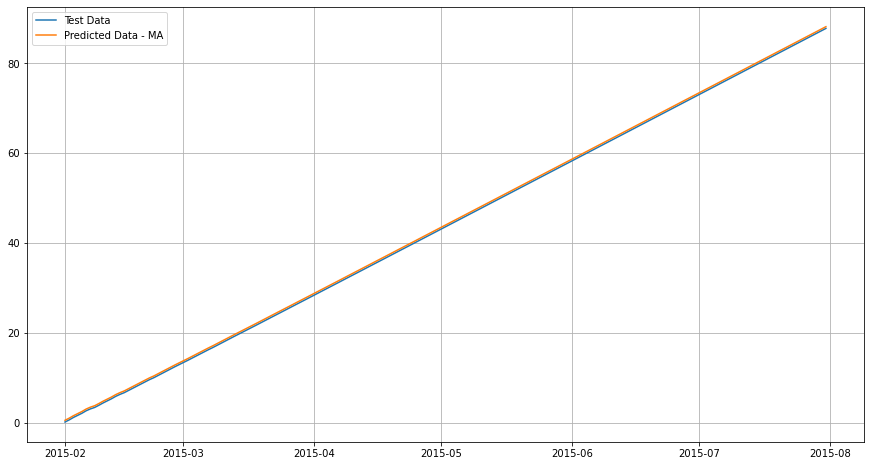

In [443]:
plt.plot(pred_str['Sales'],label='Test Data')
plt.plot(test.index,pred_str['Sales_forecast'],label='Predicted Data - MA')
plt.legend(loc='best')
plt.grid();

In [444]:
residuals=test.Sales-predictions
residuals

Date
2015-02-01   -0.134639
2015-02-02    0.124327
2015-02-03   -0.056745
2015-02-04    0.014984
2015-02-05    0.091815
                ...   
2015-07-27    0.466691
2015-07-28    0.314723
2015-07-29    0.284950
2015-07-30    0.305027
2015-07-31    0.332691
Length: 181, dtype: float64

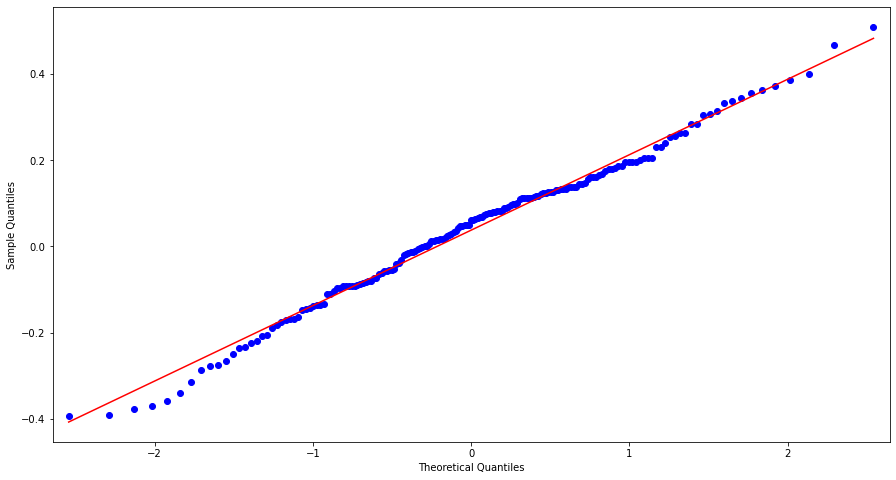

In [445]:
qqplot(residuals, line='s');

In [446]:
from sklearn.metrics import mean_squared_error

In [447]:
rmse= mean_squared_error(pred_str['Sales'], pred_str['Sales_forecast'], squared=False)
rmse

0.38425619834710695

In [448]:
def MAPE(y_true, y_predict):
    return np.mean((np.abs(y_true-y_predict))/(y_true))*100

In [449]:
mape=MAPE(pred_str['Sales'], pred_str['Sales_forecast'])
mape

3.188921487029324

In [ ]:
# AR - 1 0r 3
# MA - 1,2*,3,4,5*

In [450]:
## (1,1) or (1,3) or(1,4) or (3,1) or (3,3) or (3,4)

***ARMIA Model***

In [451]:
import itertools

In [452]:
p=q=range(0,5)
d=range(1,2)
pdq=list(itertools.product(p,d,q))
print('The parameter combinations for the model are :')
for i in range(len(pdq)):
    print('Model {}'.format(pdq[i]))

The parameter combinations for the model are :
Model (0, 1, 0)
Model (0, 1, 1)
Model (0, 1, 2)
Model (0, 1, 3)
Model (0, 1, 4)
Model (1, 1, 0)
Model (1, 1, 1)
Model (1, 1, 2)
Model (1, 1, 3)
Model (1, 1, 4)
Model (2, 1, 0)
Model (2, 1, 1)
Model (2, 1, 2)
Model (2, 1, 3)
Model (2, 1, 4)
Model (3, 1, 0)
Model (3, 1, 1)
Model (3, 1, 2)
Model (3, 1, 3)
Model (3, 1, 4)
Model (4, 1, 0)
Model (4, 1, 1)
Model (4, 1, 2)
Model (4, 1, 3)
Model (4, 1, 4)


In [453]:
obj=pd.DataFrame(columns=['param','AIC'])
obj

Empty DataFrame
Columns: [param, AIC]
Index: []

In [454]:
for param in pdq:
    try:
        mod=ARIMA(train, order=param)
        result_arima=mod.fit()
        print("Arima {}- AIC :{}".format(param, result_arima.aic))
        obj=obj.append({'param':param, 'AIC':result_arima.aic}, ignore_index=True)
        
    except:
        continue

Arima (0, 1, 0)- AIC :-155.3963572569793
Arima (0, 1, 1)- AIC :-539.5766437920565
Arima (0, 1, 2)- AIC :-550.3640814240084
Arima (0, 1, 3)- AIC :-565.3942211275639
Arima (0, 1, 4)- AIC :-573.8395432976195
Arima (1, 1, 0)- AIC :-258.0790790564756
Arima (1, 1, 1)- AIC :-546.6015161558053
Arima (1, 1, 2)- AIC :-568.7039213500047
Arima (1, 1, 3)- AIC :-566.7644429114612
Arima (1, 1, 4)- AIC :-584.1699892073352
Arima (2, 1, 0)- AIC :-363.4362003028464
Arima (2, 1, 1)- AIC :-562.9357541151721
Arima (2, 1, 2)- AIC :-583.5168900113454
Arima (2, 1, 3)- AIC :-719.2254726001674
Arima (2, 1, 4)- AIC :-739.9757307968621
Arima (3, 1, 0)- AIC :-390.96348751304185
Arima (3, 1, 1)- AIC :-561.6662755191496
Arima (3, 1, 2)- AIC :-568.737753915299
Arima (3, 1, 3)- AIC :-745.1910675075292
Arima (3, 1, 4)- AIC :-633.919814487137
Arima (4, 1, 0)- AIC :-399.14859396996417
Arima (4, 1, 1)- AIC :-574.8474318890098
Arima (4, 1, 2)- AIC :-575.5286052649162
Arima (4, 1, 3)- AIC :-719.8595769784984
Arima (4, 1, 4)-

In [455]:
obj.sort_values(by='AIC')

param         AIC
18  (3, 1, 3) -745.191068
24  (4, 1, 4) -742.777085
14  (2, 1, 4) -739.975731
23  (4, 1, 3) -719.859577
13  (2, 1, 3) -719.225473
19  (3, 1, 4) -633.919814
9   (1, 1, 4) -584.169989
12  (2, 1, 2) -583.516890
22  (4, 1, 2) -575.528605
21  (4, 1, 1) -574.847432
4   (0, 1, 4) -573.839543
17  (3, 1, 2) -568.737754
7   (1, 1, 2) -568.703921
8   (1, 1, 3) -566.764443
3   (0, 1, 3) -565.394221
11  (2, 1, 1) -562.935754
16  (3, 1, 1) -561.666276
2   (0, 1, 2) -550.364081
6   (1, 1, 1) -546.601516
1   (0, 1, 1) -539.576644
20  (4, 1, 0) -399.148594
15  (3, 1, 0) -390.963488
10  (2, 1, 0) -363.436200
5   (1, 1, 0) -258.079079
0   (0, 1, 0) -155.396357

In [468]:
model= ARIMA(train, order=(3, 1, 3))
result_Arima=model.fit()
print(result_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  760
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 380.596
Method:                       css-mle   S.D. of innovations              0.146
Date:                Tue, 22 Mar 2022   AIC                           -745.191
Time:                        16:11:33   BIC                           -708.125
Sample:                    01-02-2013   HQIC                          -730.917
                         - 01-31-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.778e-05      0.000      0.086      0.932      -0.001       0.001
ar.L1.D.Sales    -0.2414        nan        nan        nan         nan         nan
ar.L2.D.Sales    -0.9095        nan     

In [469]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [470]:
Predicted_values= result_Arima.predict(start=pred_start, end=pred_end)
Predicted_values

2015-02-01   -0.058762
2015-02-02    0.169339
2015-02-03   -0.022208
2015-02-04   -0.160529
2015-02-05    0.093476
                ...   
2015-07-27    0.169815
2015-07-28   -0.019354
2015-07-29   -0.161110
2015-07-30    0.091118
2015-07-31    0.120664
Freq: D, Length: 181, dtype: float64

In [471]:
pred=Predicted_values.cumsum()
pred

2015-02-01   -0.058762
2015-02-02    0.110577
2015-02-03    0.088370
2015-02-04   -0.072159
2015-02-05    0.021317
                ...   
2015-07-27    0.115618
2015-07-28    0.096264
2015-07-29   -0.064846
2015-07-30    0.026273
2015-07-31    0.146936
Freq: D, Length: 181, dtype: float64

In [472]:
Arima_pred=pd.DataFrame(pred, columns=train.columns)
Arima_pred

Sales
2015-02-01 -0.058762
2015-02-02  0.110577
2015-02-03  0.088370
2015-02-04 -0.072159
2015-02-05  0.021317
...              ...
2015-07-27  0.115618
2015-07-28  0.096264
2015-07-29 -0.064846
2015-07-30  0.026273
2015-07-31  0.146936

[181 rows x 1 columns]

In [473]:
pred_str=Arima_pred.copy()
columns=train.columns
for col in columns:
    pred_str[str(col+'_forecast')]=train[col].iloc[-1]+pred_str[str(col)]

In [474]:
pred_str.head()

Sales  Sales_forecast
2015-02-01 -0.058762        0.325495
2015-02-02  0.110577        0.494833
2015-02-03  0.088370        0.472626
2015-02-04 -0.072159        0.312097
2015-02-05  0.021317        0.405573

In [475]:
from sklearn.metrics import mean_squared_error

In [476]:
rmse= mean_squared_error(pred_str['Sales'], pred_str['Sales_forecast'], squared=False)
rmse

0.3842561983471074

In [477]:
def MAPE(y_true, y_predict):
    return np.mean((np.abs(y_true-y_predict))/(y_true))*100

In [478]:
mape=MAPE(test['Sales'], Arima_pred['Sales'])
mape

96.62320184440172

In [479]:
AA=result_Arima.forecast(len(test))
AA[0]

array([0.32549461, 0.49483341, 0.47262572, 0.31209681, 0.40557331,
       0.52455877, 0.37823399, 0.32443612, 0.49478294, 0.47289052,
       0.31237848, 0.40576925, 0.5248242 , 0.37856404, 0.32466994,
       0.49499535, 0.47320876, 0.31267107, 0.40596742, 0.52509003,
       0.37889419, 0.32490381, 0.49520774, 0.47352698, 0.31296369,
       0.4061656 , 0.52535582, 0.37922434, 0.32513772, 0.49542011,
       0.47384517, 0.31325635, 0.4063638 , 0.52562157, 0.3795545 ,
       0.32537168, 0.49563245, 0.47416333, 0.31354905, 0.40656201,
       0.52588728, 0.37988467, 0.32560567, 0.49584477, 0.47448147,
       0.31384178, 0.40676023, 0.52615294, 0.38021484, 0.3258397 ,
       0.49605706, 0.47479957, 0.31413455, 0.40695846, 0.52641857,
       0.38054502, 0.32607377, 0.49626934, 0.47511764, 0.31442736,
       0.40715671, 0.52668415, 0.3808752 , 0.32630788, 0.49648159,
       0.47543569, 0.3147202 , 0.40735497, 0.52694969, 0.38120539,
       0.32654203, 0.49669381, 0.47575371, 0.31501307, 0.40755

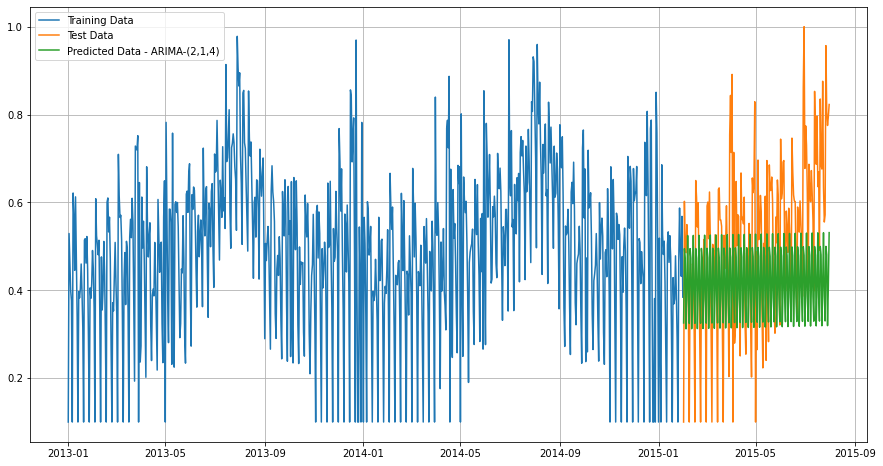

In [480]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_str['Sales_forecast'],label='Predicted Data - ARIMA-(2,1,4)')
plt.legend(loc='best')
plt.grid();

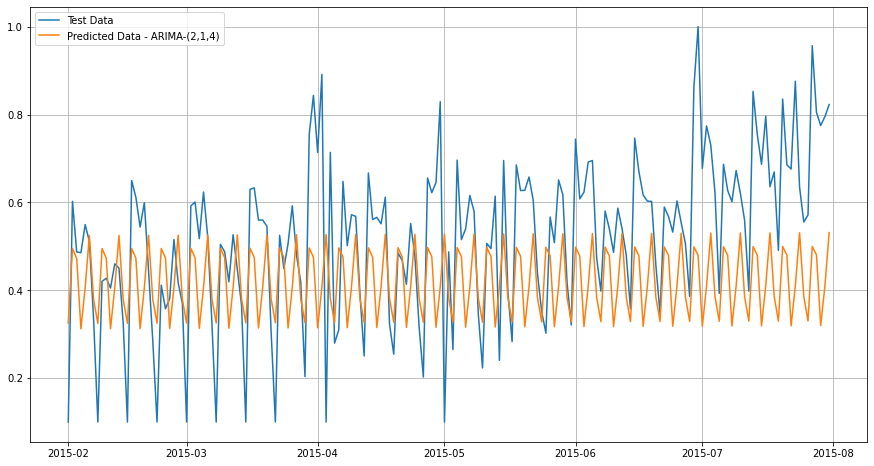

In [481]:
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_str['Sales_forecast'],label='Predicted Data - ARIMA-(2,1,4)')
plt.legend(loc='best')
plt.grid();

In [486]:
final_pred4=result_Arima.forecast(260)

In [491]:
jj=final_pred4[0]
jj

array([0.32549461, 0.49483341, 0.47262572, 0.31209681, 0.40557331,
       0.52455877, 0.37823399, 0.32443612, 0.49478294, 0.47289052,
       0.31237848, 0.40576925, 0.5248242 , 0.37856404, 0.32466994,
       0.49499535, 0.47320876, 0.31267107, 0.40596742, 0.52509003,
       0.37889419, 0.32490381, 0.49520774, 0.47352698, 0.31296369,
       0.4061656 , 0.52535582, 0.37922434, 0.32513772, 0.49542011,
       0.47384517, 0.31325635, 0.4063638 , 0.52562157, 0.3795545 ,
       0.32537168, 0.49563245, 0.47416333, 0.31354905, 0.40656201,
       0.52588728, 0.37988467, 0.32560567, 0.49584477, 0.47448147,
       0.31384178, 0.40676023, 0.52615294, 0.38021484, 0.3258397 ,
       0.49605706, 0.47479957, 0.31413455, 0.40695846, 0.52641857,
       0.38054502, 0.32607377, 0.49626934, 0.47511764, 0.31442736,
       0.40715671, 0.52668415, 0.3808752 , 0.32630788, 0.49648159,
       0.47543569, 0.3147202 , 0.40735497, 0.52694969, 0.38120539,
       0.32654203, 0.49669381, 0.47575371, 0.31501307, 0.40755

In [492]:
len(jj)

260

In [494]:
ff=pd.DataFrame(jj, columns=['Forecast'])

In [495]:
ff

Forecast
0    0.325495
1    0.494833
2    0.472626
3    0.312097
4    0.405573
..        ...
255  0.322640
256  0.412713
257  0.534104
258  0.390122
259  0.332879

[260 rows x 1 columns]

In [496]:
date = pd.date_range(start='2015/02/01', periods=260, freq='D')
date

DatetimeIndex(['2015-02-01', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08',
               '2015-02-09', '2015-02-10',
               ...
               '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
               '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
               '2015-10-17', '2015-10-18'],
              dtype='datetime64[ns]', length=260, freq='D')

In [497]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [498]:
ff=ff.set_index('Time_Stamp')

In [499]:
ff

Forecast
Time_Stamp          
2015-02-01  0.325495
2015-02-02  0.494833
2015-02-03  0.472626
2015-02-04  0.312097
2015-02-05  0.405573
...              ...
2015-10-14  0.322640
2015-10-15  0.412713
2015-10-16  0.534104
2015-10-17  0.390122
2015-10-18  0.332879

[260 rows x 1 columns]

In [500]:
final_value=scaler.inverse_transform(ff[['Forecast']])
final_value

array([[1930.9898561 ],
       [3296.98946789],
       [3117.84747807],
       [1822.91426262],
       [2576.95801815],
       [3536.77410214],
       [2356.42082671],
       [1922.45136089],
       [3296.58241582],
       [3119.98348973],
       [1825.18641923],
       [2578.53862536],
       [3538.91518753],
       [2359.08324118],
       [1924.33748402],
       [3298.29584049],
       [3122.55068494],
       [1827.54663142],
       [2580.13719058],
       [3541.0595685 ],
       [2361.74644077],
       [1926.22407355],
       [3300.00910895],
       [3125.11765341],
       [1829.90713532],
       [2581.73585982],
       [3543.20361294],
       [2364.40968635],
       [1928.1109792 ],
       [3301.72219078],
       [3127.68438877],
       [1832.26792952],
       [2583.33463299],
       [3545.34732083],
       [2367.07297771],
       [1929.99820103],
       [3303.43508619],
       [3130.2508909 ],
       [1834.62901391],
       [2584.9335103 ],
       [3547.49069221],
       [2369.736

In [501]:
kk=pd.DataFrame(final_value, columns=['Final_forecast'])

In [502]:
kk

Final_forecast
0       1930.989856
1       3296.989468
2       3117.847478
3       1822.914263
4       2576.958018
..              ...
255     1907.965872
256     2634.551396
257     3613.768526
258     2452.321221
259     1990.556548

[260 rows x 1 columns]

In [503]:
kk['Time_Stamp'] = pd.DataFrame(date)

In [504]:
kk=kk.set_index('Time_Stamp')

In [505]:
kk

Final_forecast
Time_Stamp                
2015-02-01     1930.989856
2015-02-02     3296.989468
2015-02-03     3117.847478
2015-02-04     1822.914263
2015-02-05     2576.958018
...                    ...
2015-10-14     1907.965872
2015-10-15     2634.551396
2015-10-16     3613.768526
2015-10-17     2452.321221
2015-10-18     1990.556548

[260 rows x 1 columns]

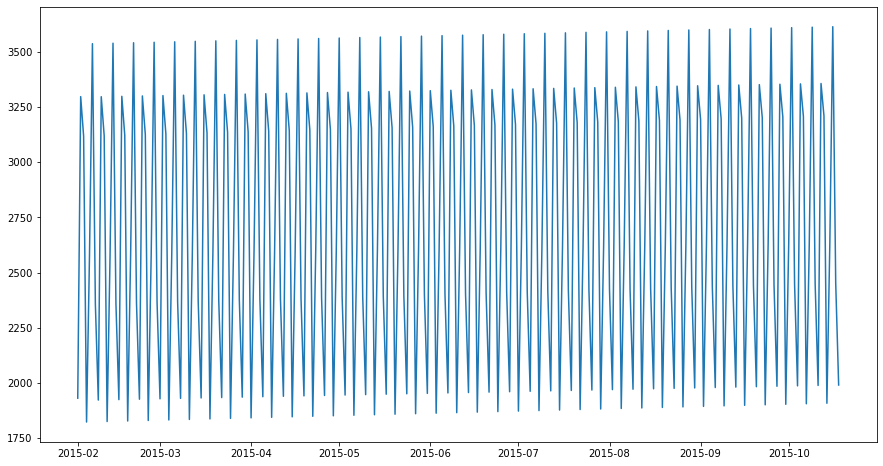

In [506]:
plt.plot(kk)

Text(0.5, 0, 'Days')

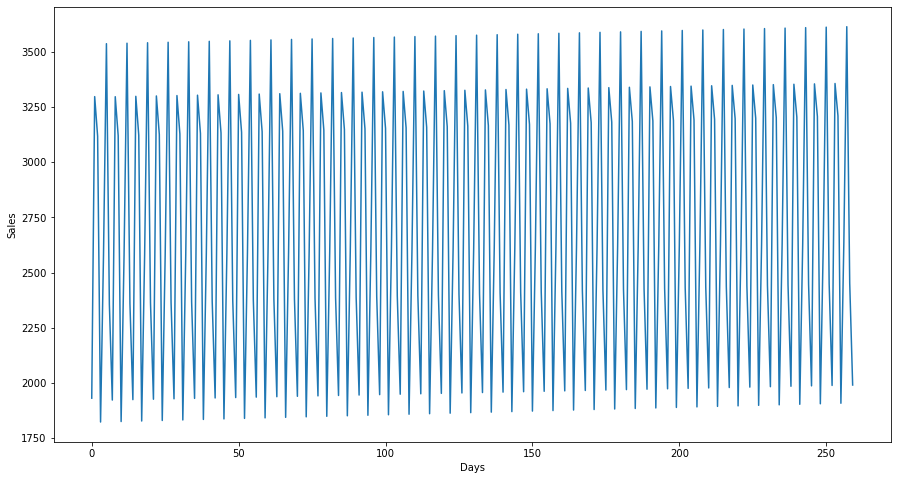

In [507]:
x=list(range(len(kk.Final_forecast.index)))
y=kk.Final_forecast

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

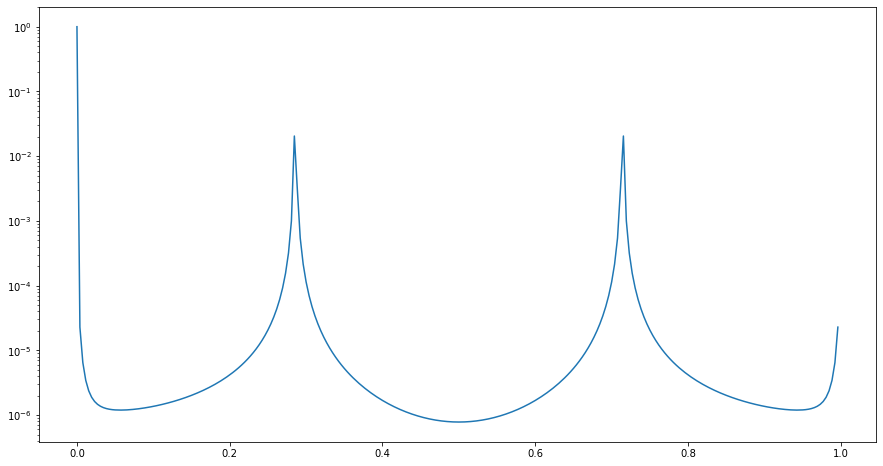

In [508]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

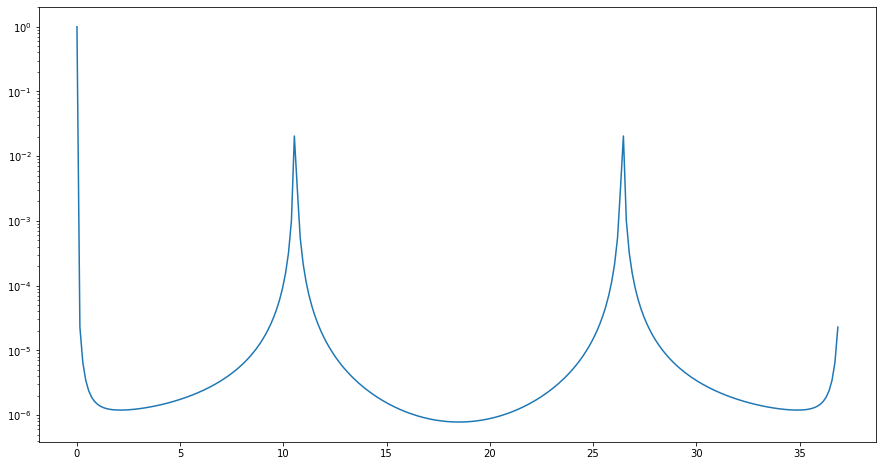

In [509]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/37)
plt.semilogy(results['period'], results['nspectrum'])

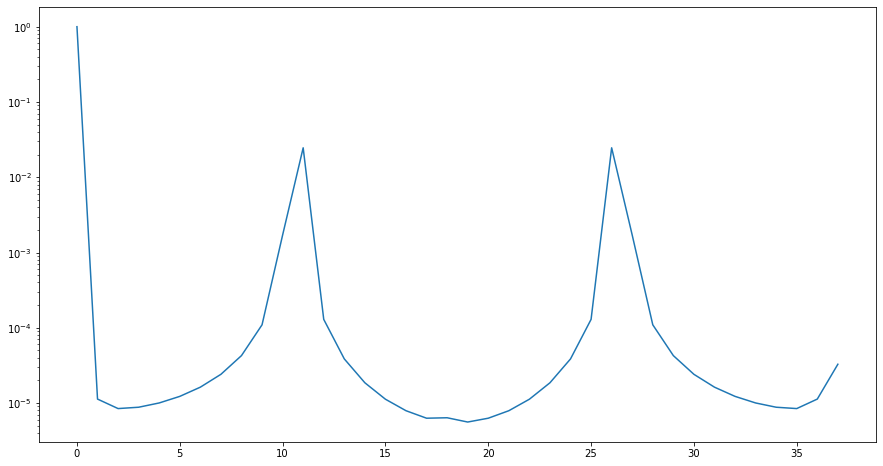

In [510]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)

***SARIMA Model***

In [511]:
import itertools
p = q = range(0, 5)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(0, 0, 3, 7)
Model: (0, 0, 2)(0, 0, 4, 7)


In [512]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [513]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:1188.6795853671413
SARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:551.5023456045847
SARIMA(0, 0, 0)x(0, 0, 2, 7)12 - AIC:68.17252738393819
SARIMA(0, 0, 0)x(0, 0, 3, 7)12 - AIC:-104.91804558105295
SARIMA(0, 0, 0)x(0, 0, 4, 7)12 - AIC:-287.7032919964407
SARIMA(0, 0, 0)x(0, 1, 0, 7)12 - AIC:-732.7060853188793
SARIMA(0, 0, 0)x(0, 1, 1, 7)12 - AIC:-1050.3962468267118
SARIMA(0, 0, 0)x(0, 1, 2, 7)12 - AIC:-1042.0698878089602
SARIMA(0, 0, 0)x(0, 1, 3, 7)12 - AIC:-1033.8501675951172
SARIMA(0, 0, 0)x(0, 1, 4, 7)12 - AIC:-1019.7331111522471
SARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:-737.5651595515268
SARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:-1057.8699657223574
SARIMA(0, 0, 0)x(1, 0, 2, 7)12 - AIC:-1052.453008048529
SARIMA(0, 0, 0)x(1, 0, 3, 7)12 - AIC:-1044.7237736607258
SARIMA(0, 0, 0)x(1, 0, 4, 7)12 - AIC:-1029.5823238434089
SARIMA(0, 0, 0)x(1, 1, 0, 7)12 - AIC:-1022.9728488763988
SARIMA(0, 0, 0)x(1, 1, 1, 7)12 - AIC:-1060.8744660820703
SARIMA(0, 0, 0)x(1, 1, 2, 7)12 - AIC:-10

In [514]:
dfObj2.sort_values(by=['AIC'])

param      seasonal          AIC
732   (1, 0, 4)  (3, 0, 2, 7) -1199.432403
2222  (4, 0, 4)  (2, 0, 2, 7) -1199.131261
711   (1, 0, 4)  (1, 0, 1, 7) -1198.736755
2211  (4, 0, 4)  (1, 0, 1, 7) -1197.673240
482   (0, 1, 4)  (3, 0, 2, 7) -1197.216475
...         ...           ...          ...
51    (0, 0, 1)  (0, 0, 1, 7)   143.595837
100   (0, 0, 2)  (0, 0, 0, 7)   279.100491
1     (0, 0, 0)  (0, 0, 1, 7)   551.502346
50    (0, 0, 1)  (0, 0, 0, 7)   556.268611
0     (0, 0, 0)  (0, 0, 0, 7)  1188.679585

[2500 rows x 3 columns]

In [515]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(1,0,4),
                                seasonal_order=(3,0,2,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                  Sales   No. Observations:                  761
Model:             SARIMAX(1, 0, 4)x(3, 0, [1, 2], 7)   Log Likelihood                 610.716
Date:                                Tue, 22 Mar 2022   AIC                          -1199.432
Time:                                        20:44:44   BIC                          -1148.774
Sample:                                    01-01-2013   HQIC                         -1179.899
                                         - 01-31-2015                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9834      0.013     76.556      0.000       0.958       1.009
ma.

In [516]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

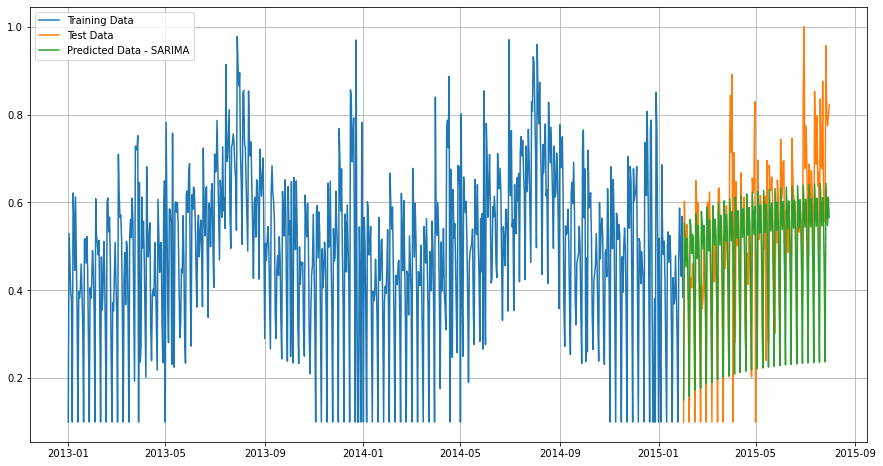

In [517]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

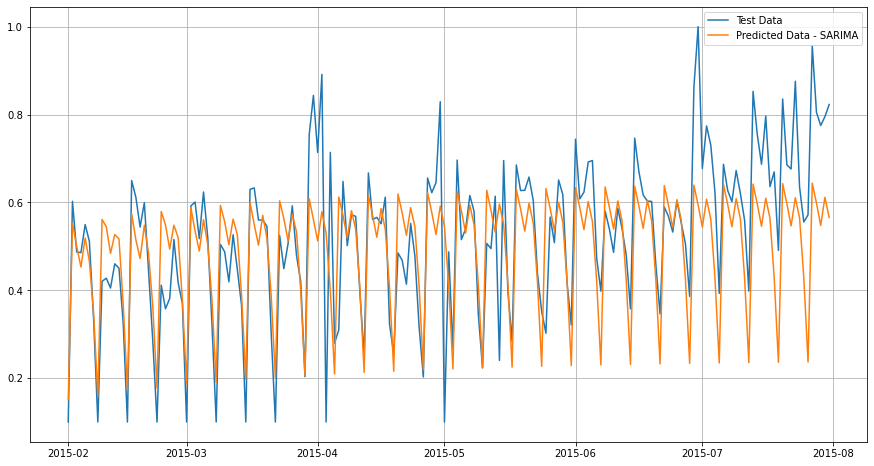

In [518]:
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [519]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sales'],SARIMA_predictions, squared=False)
print(rmse)

0.1298148009516513


In [520]:
mape = MAPE(test['Sales'],SARIMA_predictions)
print(mape)

24.98543132573913


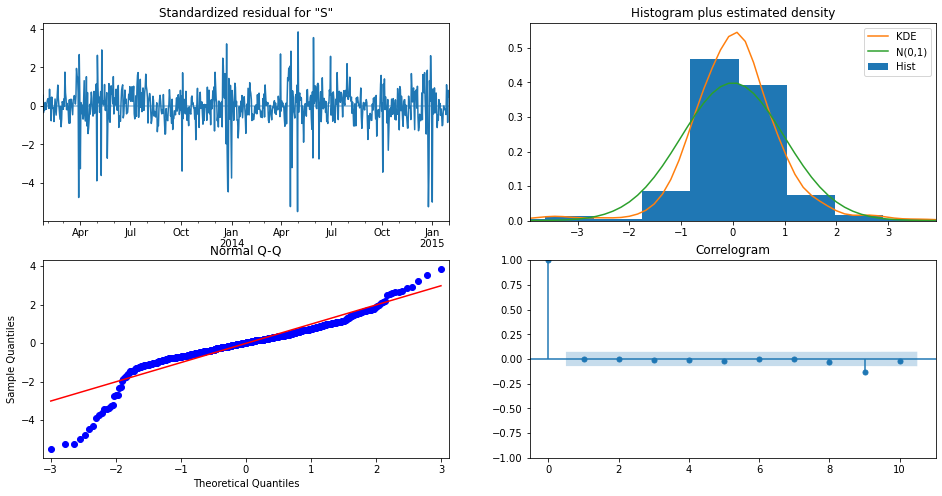

In [521]:
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

In [524]:
final_pred4=model_Sarima.forecast(260)

In [526]:
fv4=final_pred4
fv4

2015-02-01    0.151012
2015-02-02    0.552621
2015-02-03    0.499661
2015-02-04    0.452802
2015-02-05    0.518772
                ...   
2015-10-14    0.554630
2015-10-15    0.619174
2015-10-16    0.572811
2015-10-17    0.436103
2015-10-18    0.242097
Freq: D, Name: predicted_mean, Length: 260, dtype: float64

In [527]:
len(fv4)

260

In [528]:
final_value44=scaler.inverse_transform([fv4])
final_value44

array([[ 523.49358117, 3763.14310133, 3335.93338542, 2957.93724426,
        3490.09607111, 3065.80742754, 2117.21164276,  586.04665793,
        3832.35926165, 3697.73414366, 3208.77824036, 3555.32755644,
        3473.65855649, 2272.95675569,  700.30625358, 3938.68175809,
        3456.2633113 , 3113.55271173, 3725.87353574, 3208.38368836,
        2229.14780302,  733.31735029, 3978.668293  , 3730.65332071,
        3288.94073667, 3726.20908936, 3499.02006561, 2356.4674677 ,
         809.62144497, 4051.64323735, 3618.41443999, 3252.62284701,
        3827.35457217, 3370.37399029, 2350.28411629,  841.08992539,
        4087.93256283, 3791.84817308, 3367.36733423, 3838.52998891,
        3552.00236751, 2436.9591942 ,  896.66432274, 4142.35482534,
        3740.50057695, 3358.88227081, 3908.10693366, 3490.54082519,
        2445.01923727,  925.4298177 , 4174.64107588, 3851.26309007,
        3435.65377684, 3925.35652238, 3605.42218383, 2504.97778802,
         966.91707656, 4216.24085499, 3832.02333

In [529]:
date4 = pd.date_range(start='2015/02/01', periods=260, freq='D')
date4

DatetimeIndex(['2015-02-01', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08',
               '2015-02-09', '2015-02-10',
               ...
               '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
               '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
               '2015-10-17', '2015-10-18'],
              dtype='datetime64[ns]', length=260, freq='D')

In [530]:
ff44=pd.DataFrame(final_value44.reshape(-1,1), columns=['Forecast'])

In [531]:
ff44

Forecast
0     523.493581
1    3763.143101
2    3335.933385
3    2957.937244
4    3490.096071
..           ...
255  3779.352693
256  4300.002905
257  3926.008647
258  2823.229035
259  1258.246158

[260 rows x 1 columns]

In [532]:
ff44['Time_stamp']= date4

In [533]:
ff44

Forecast Time_stamp
0     523.493581 2015-02-01
1    3763.143101 2015-02-02
2    3335.933385 2015-02-03
3    2957.937244 2015-02-04
4    3490.096071 2015-02-05
..           ...        ...
255  3779.352693 2015-10-14
256  4300.002905 2015-10-15
257  3926.008647 2015-10-16
258  2823.229035 2015-10-17
259  1258.246158 2015-10-18

[260 rows x 2 columns]

In [534]:
ff44=ff44.set_index('Time_stamp')

In [535]:
ff44

Forecast
Time_stamp             
2015-02-01   523.493581
2015-02-02  3763.143101
2015-02-03  3335.933385
2015-02-04  2957.937244
2015-02-05  3490.096071
...                 ...
2015-10-14  3779.352693
2015-10-15  4300.002905
2015-10-16  3926.008647
2015-10-17  2823.229035
2015-10-18  1258.246158

[260 rows x 1 columns]

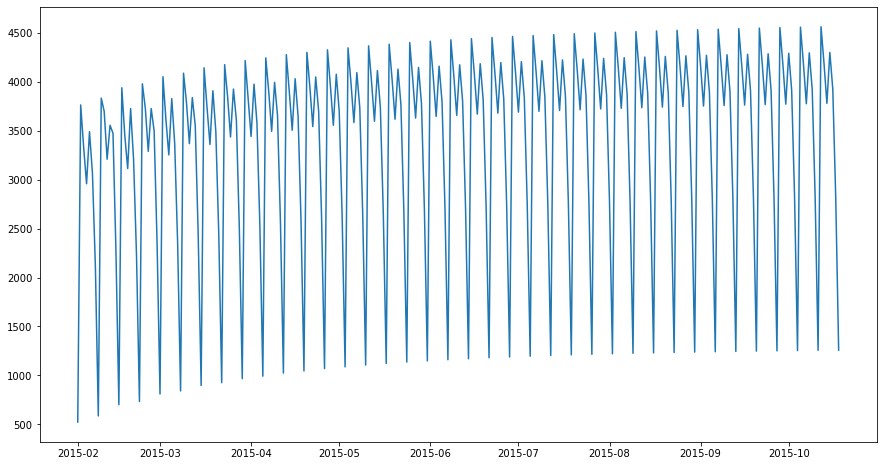

In [536]:
plt.plot(ff44)

Text(0.5, 0, 'Days')

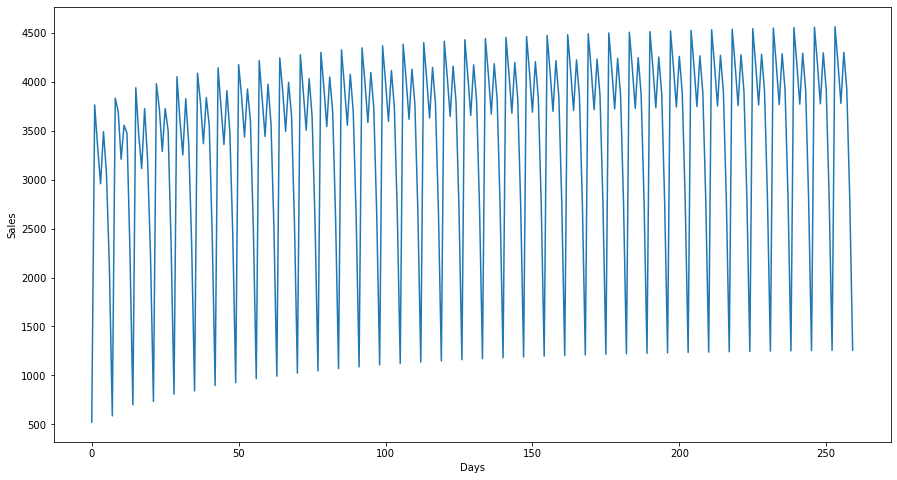

In [537]:
x=list(range(len(ff44.Forecast.index)))
y=ff44.Forecast

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

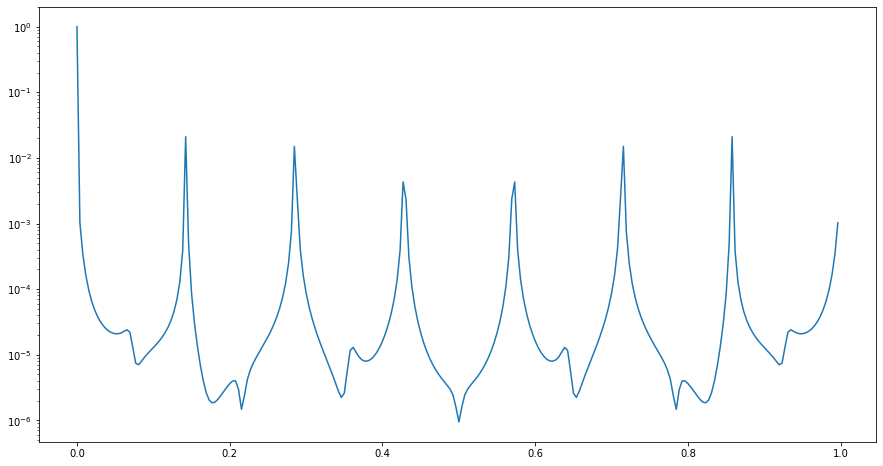

In [538]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

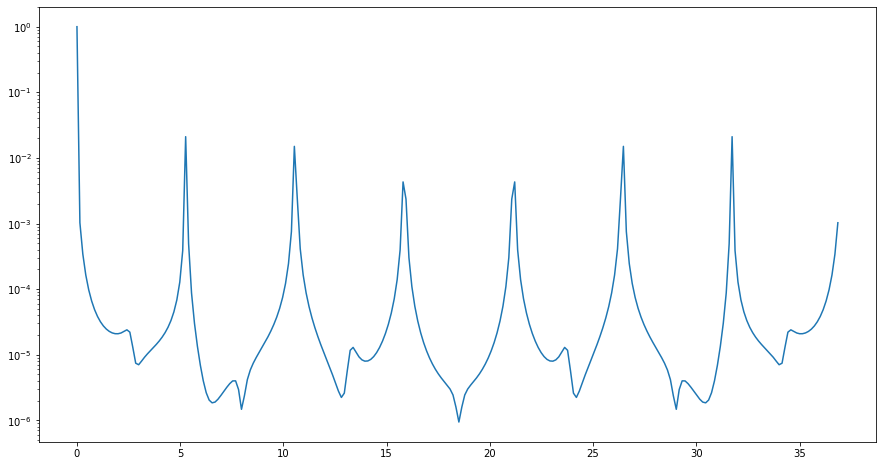

In [539]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/37)
plt.semilogy(results['period'], results['nspectrum'])

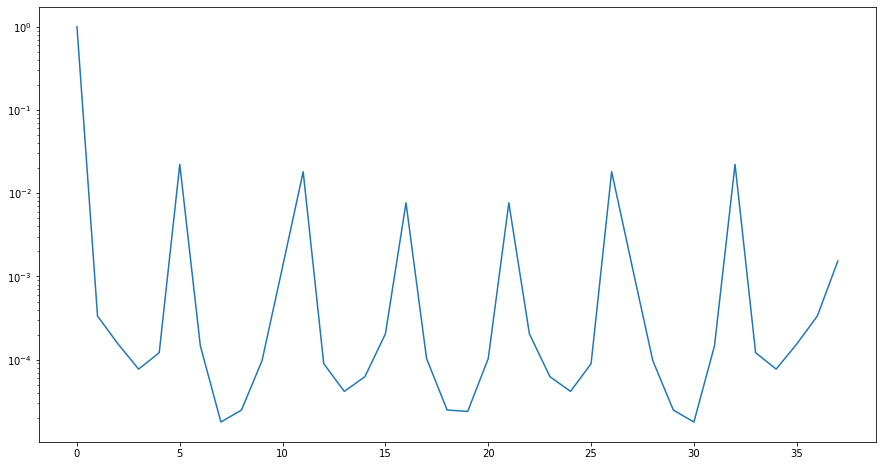

In [540]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)